1. Хочу посмотреть, какие признаки вообще есть

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

from tabulate import tabulate
print(tabulate([(col, dtype) for col, dtype in zip(df.columns, df.dtypes)],
               headers=['Признак', 'Тип данных'], tablefmt='grid'))

print("smth")

from tabulate import tabulate
print(tabulate([(col, dtype) for col, dtype in zip(df_test.columns, df_test.dtypes)],
               headers=['Признак', 'Тип данных'], tablefmt='grid'))

test_ids = df_test['ID'].copy() # к этому присоединю
df_test = df_test.drop(columns=['ID'])

print(df_test.isnull().sum().sum())

from tabulate import tabulate
print(tabulate([(col, dtype) for col, dtype in zip(df_test.columns, df_test.dtypes)],
               headers=['Признак', 'Тип данных'], tablefmt='grid'))



+----------------------------+--------------+
| Признак                    | Тип данных   |
+============================+==============+
| ApplicationDate            | object       |
+----------------------------+--------------+
| Age                        | float64      |
+----------------------------+--------------+
| AnnualIncome               | float64      |
+----------------------------+--------------+
| CreditScore                | float64      |
+----------------------------+--------------+
| LoanAmount                 | float64      |
+----------------------------+--------------+
| LoanDuration               | float64      |
+----------------------------+--------------+
| MaritalStatus              | object       |
+----------------------------+--------------+
| NumberOfDependents         | float64      |
+----------------------------+--------------+
| HomeOwnershipStatus        | object       |
+----------------------------+--------------+
| MonthlyDebtPayments        | flo

2. Удалю все строки где есть NULL-value и проведу анализ выбросов целевой переменной

(11017, 36)
В данных больше нет null значений
(9986, 36)
RiskScore
-9.999999e+06    115
 1.000000e+07     84
 3.704447e+01      3
 5.967628e+01      3
 6.785041e+01      3
                ... 
 4.093270e+01      1
 3.174699e+01      1
 7.617149e+01      1
 4.058056e+01      1
 5.137230e+01      1
Name: count, Length: 9334, dtype: int64


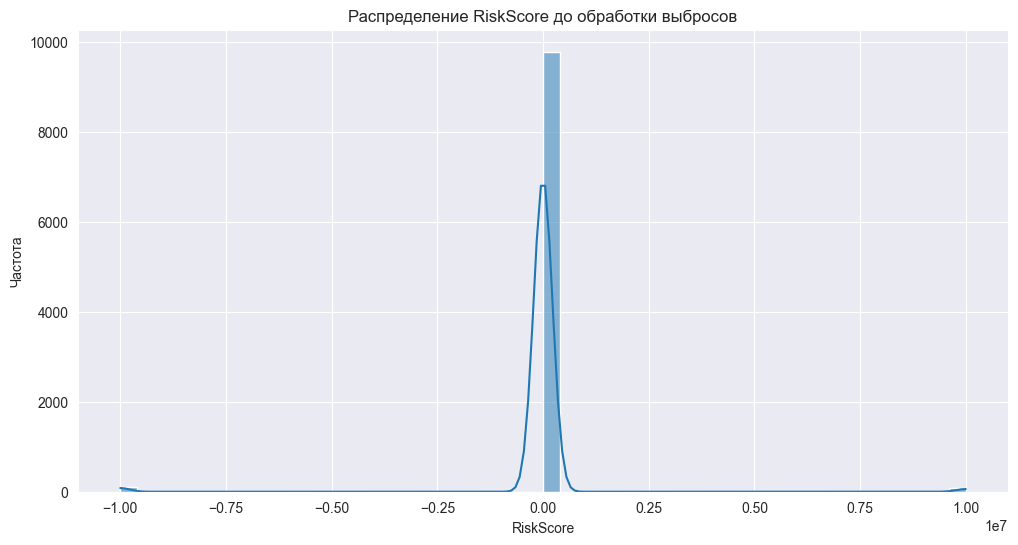

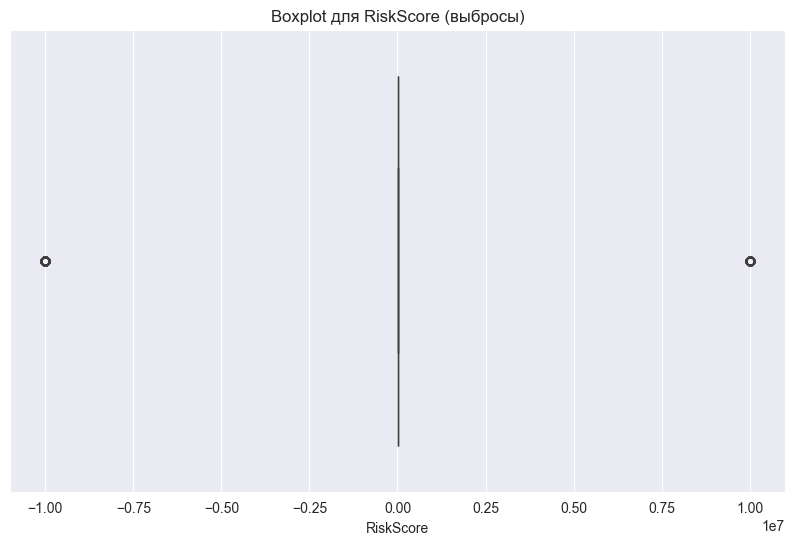


Границы выбросов:
Нижняя граница: -16.71
Верхняя граница: 114.55

Количество выбросов: 199 (1.99%)


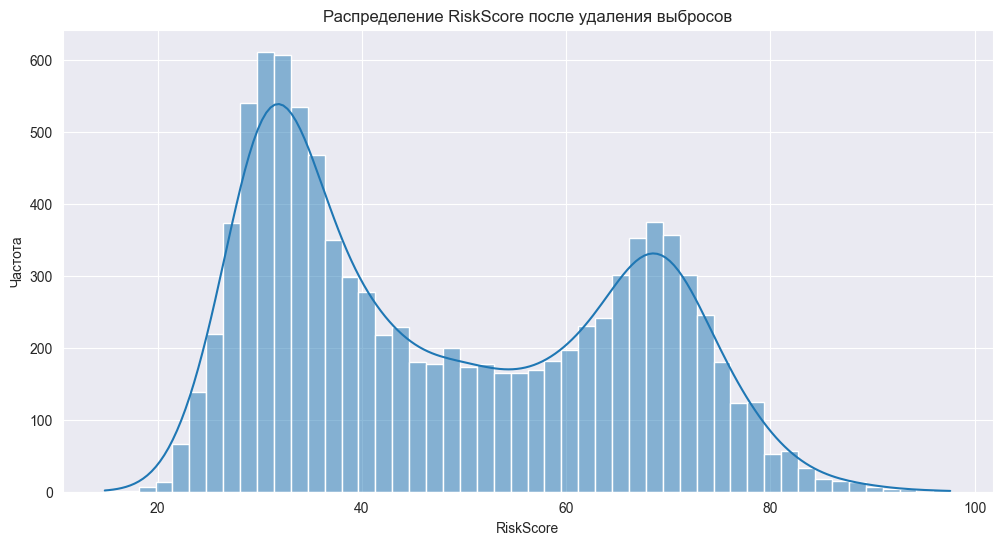

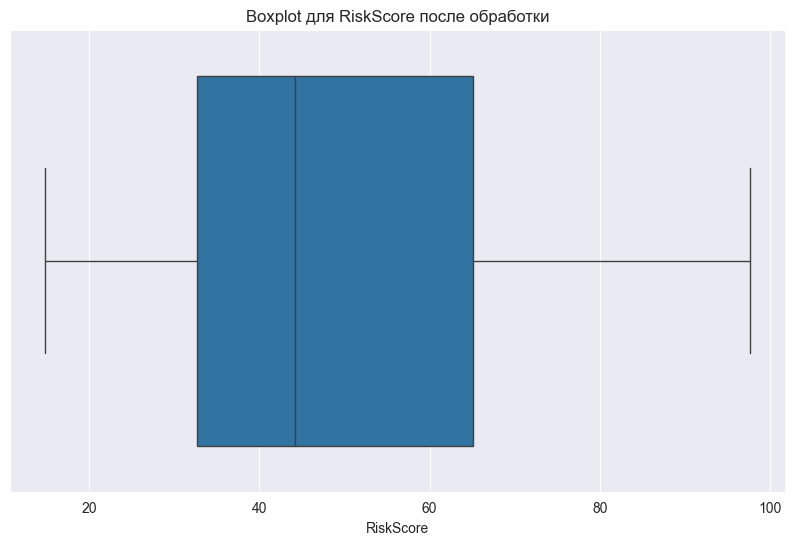


Сравнение статистик до и после:
До обработки:
count    9.986000e+03
mean    -3.099606e+04
std      1.411392e+06
min     -9.999999e+06
25%      3.251016e+01
50%      4.406128e+01
75%      6.532677e+01
max      1.000000e+07
Name: RiskScore, dtype: float64

После обработки:
count    9787.000000
mean       48.349800
std        17.255990
min        14.841417
25%        32.699940
50%        44.151002
75%        65.122034
max        97.597249
Name: RiskScore, dtype: float64
(9787, 36)


In [418]:
print(df.shape)

df_cleaned = df.dropna()
if df_cleaned.isnull().sum().sum() == 0:
    print("В данных больше нет null значений")
else:
    print("Обнаружены null значения")

print(df_cleaned.shape)

target_col = "RiskScore"
print(df_cleaned[target_col].value_counts())

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned[target_col], bins=50, kde=True)
plt.title('Распределение RiskScore до обработки выбросов')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned[target_col])
plt.title('Boxplot для RiskScore (выбросы)')
plt.show()

Q1 = df_cleaned[target_col].quantile(0.25)
Q3 = df_cleaned[target_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nГраницы выбросов:")
print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")


outliers = df_cleaned[(df_cleaned[target_col] < lower_bound) | (df_cleaned[target_col] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)} ({len(outliers)/len(df_cleaned)*100:.2f}%)")

df_ = df_cleaned[(df_cleaned[target_col] >= lower_bound) &
                           (df_cleaned[target_col] <= upper_bound)].copy()


plt.figure(figsize=(12, 6))
sns.histplot(df_[target_col], bins=50, kde=True)
plt.title('Распределение RiskScore после удаления выбросов')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_[target_col])
plt.title('Boxplot для RiskScore после обработки')
plt.show()

print("\nСравнение статистик до и после:")
print("До обработки:")
print(df_cleaned[target_col].describe())
print("\nПосле обработки:")
print(df_[target_col].describe())
print(df_.shape)

3. Посмотрим на типы признаков (их примерный состав)


In [419]:

numeric_cols = df_.select_dtypes(include=['float64']).columns.tolist()
print("\nЧисловые признаки (%d):" % len(numeric_cols))
print(numeric_cols)

categorical_cols = df_.select_dtypes(include=['object']).columns.tolist()
print("\nКатегориальные признаки (%d):" % len(categorical_cols))
print(categorical_cols)

numeric_cols_test = df_test.select_dtypes(include=['float64']).columns.tolist()
print("\nЧисловые признаки (%d):" % len(numeric_cols))
print(numeric_cols)

categorical_cols_test = df_test.select_dtypes(include=['object']).columns.tolist()
print("\nКатегориальные признаки (%d):" % len(categorical_cols))
print(categorical_cols)


Числовые признаки (30):
['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

Категориальные признаки (6):
['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

Числовые признаки (30):
['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio'

4. Посмотрим на псевдо-числовые признаки - те, у которых мало вариативности

In [420]:
pseudo_numeric = []
for col in numeric_cols:
    if df_[col].nunique() < 3:
        pseudo_numeric.append(col)

if pseudo_numeric:
    print("\nВозможные псевдо-числовые признаки (мало уникальных значений):")
    print(pseudo_numeric)

    for col in pseudo_numeric:
        print(f"\nРаспределение для {col}:")
        print(df_[col].value_counts().sort_index())




Возможные псевдо-числовые признаки (мало уникальных значений):
['BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']

Распределение для BankruptcyHistory:
BankruptcyHistory
0.0    9272
1.0     515
Name: count, dtype: int64

Распределение для PreviousLoanDefaults:
PreviousLoanDefaults
0.0    8845
1.0     942
Name: count, dtype: int64

Распределение для LoanApproved:
LoanApproved
0.0    4775
1.0    5012
Name: count, dtype: int64


5. Значит в первую очередь будем обрабатывать (пытаться перевести в ноормальные числовые признаки) категориальные признаки: ['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'] и псевдо-числовые признаки: ['LoanDuration', 'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']

7. Выведем парные зависимости для первых 5 числовых признаков

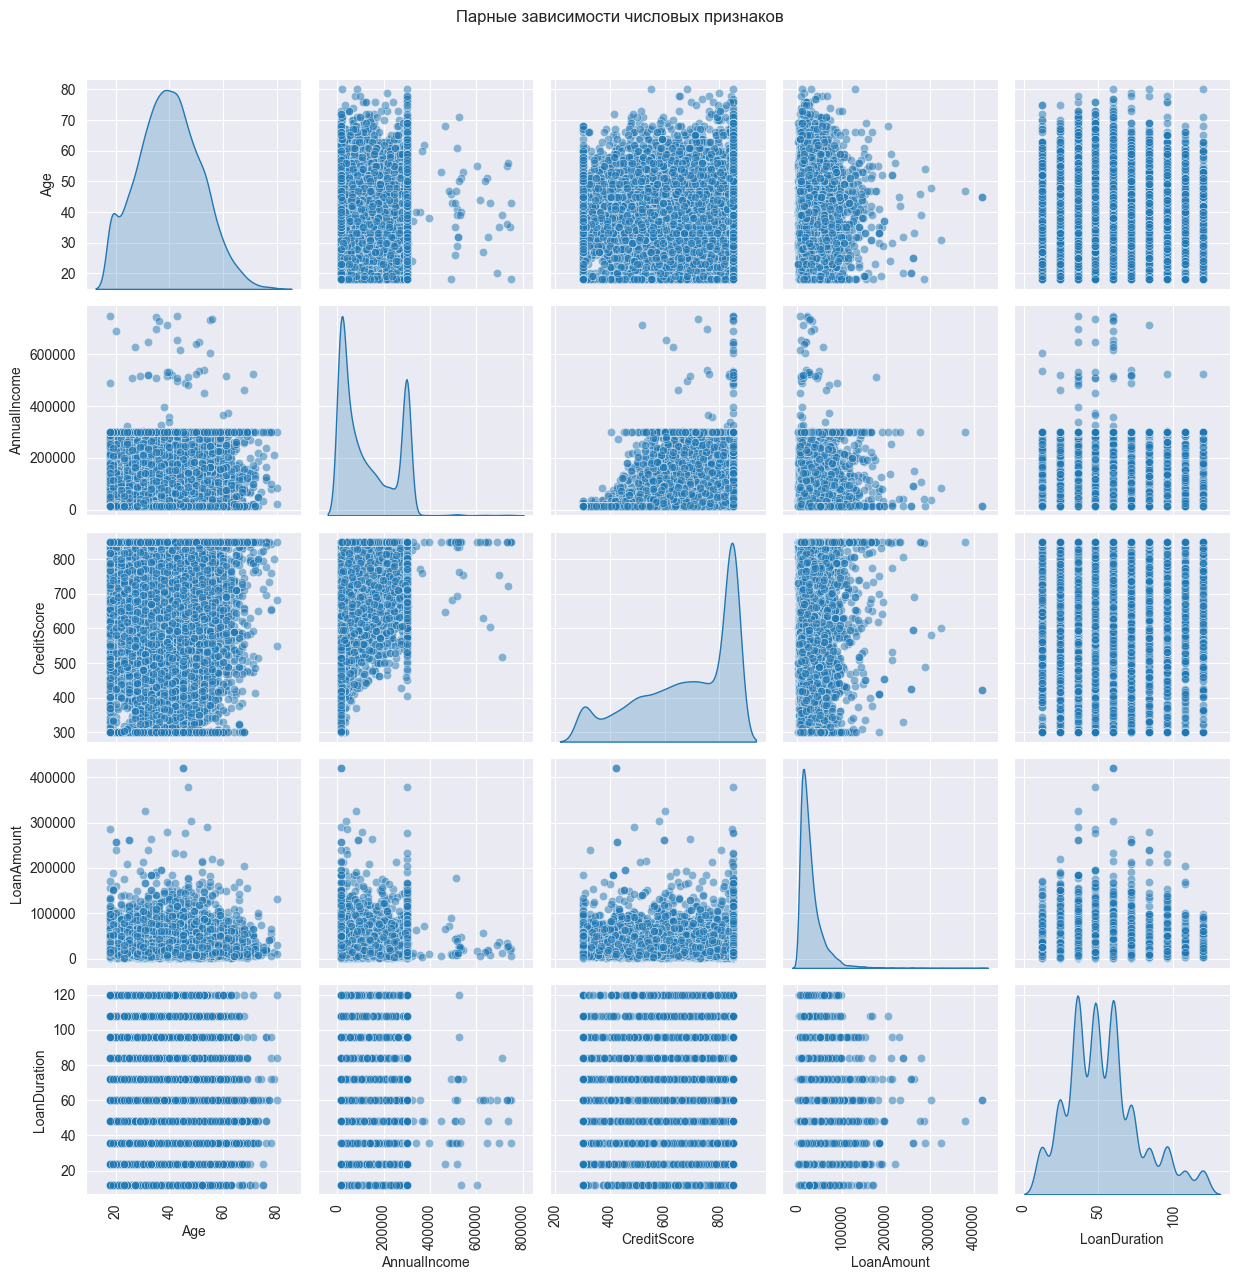

In [421]:
num_cols = df_.select_dtypes(include=['float64']).columns[:5]

g = sns.pairplot(df_[num_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Парные зависимости числовых признаков', y=1.02)

for ax in g.axes.flat:
    if ax.get_xlabel():
        ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

9. Посмотрим на числовые признаки подробнее

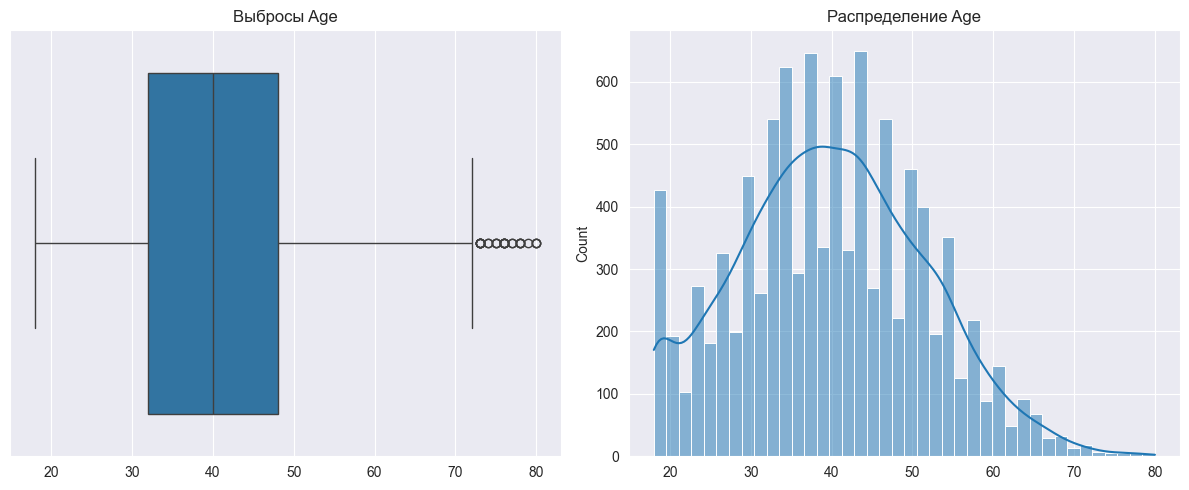

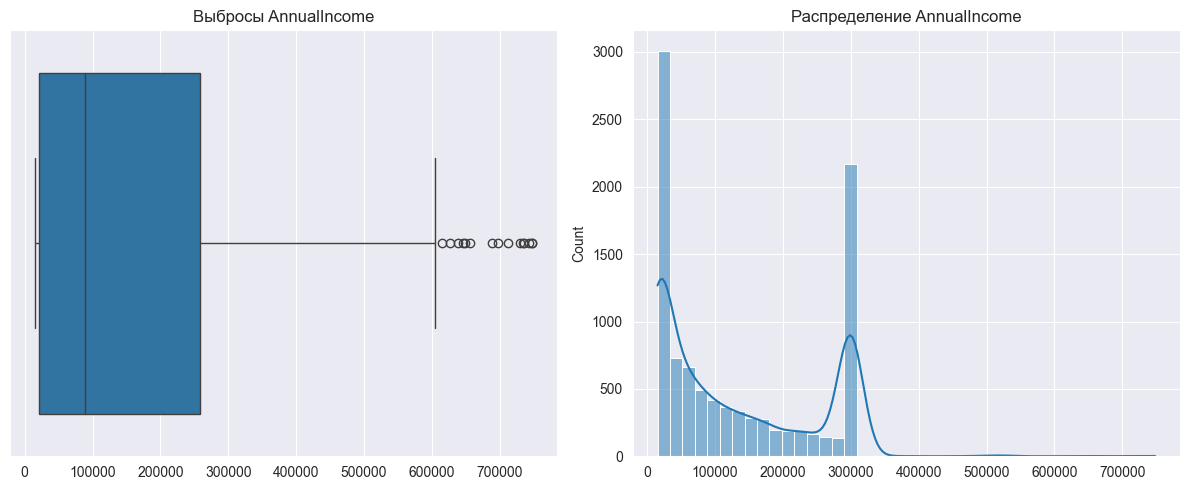

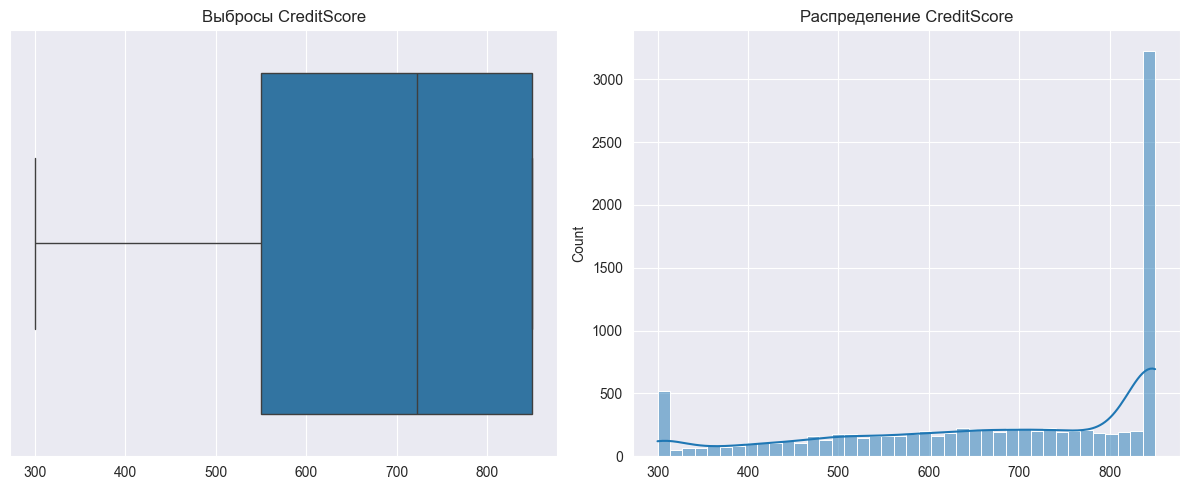

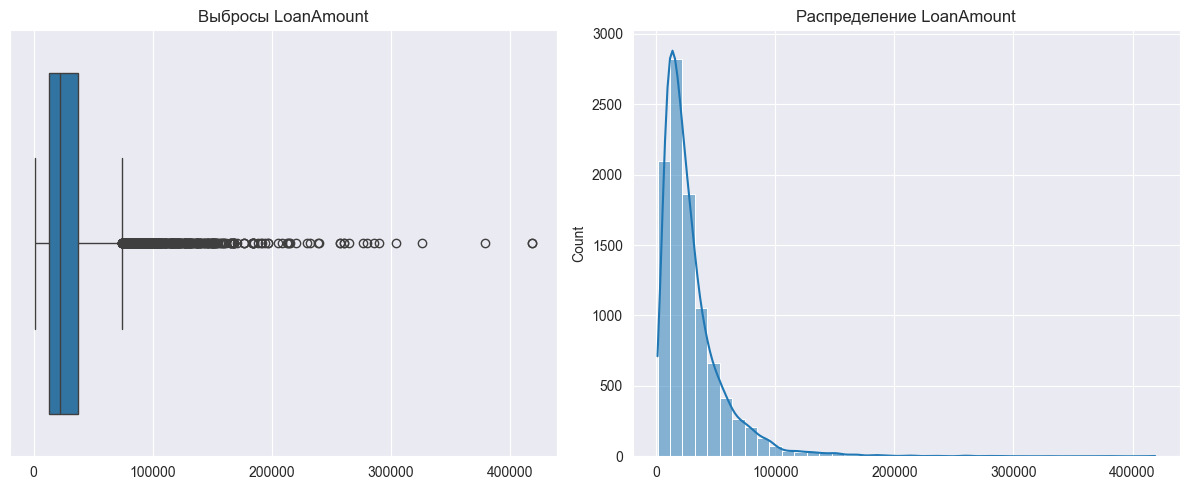

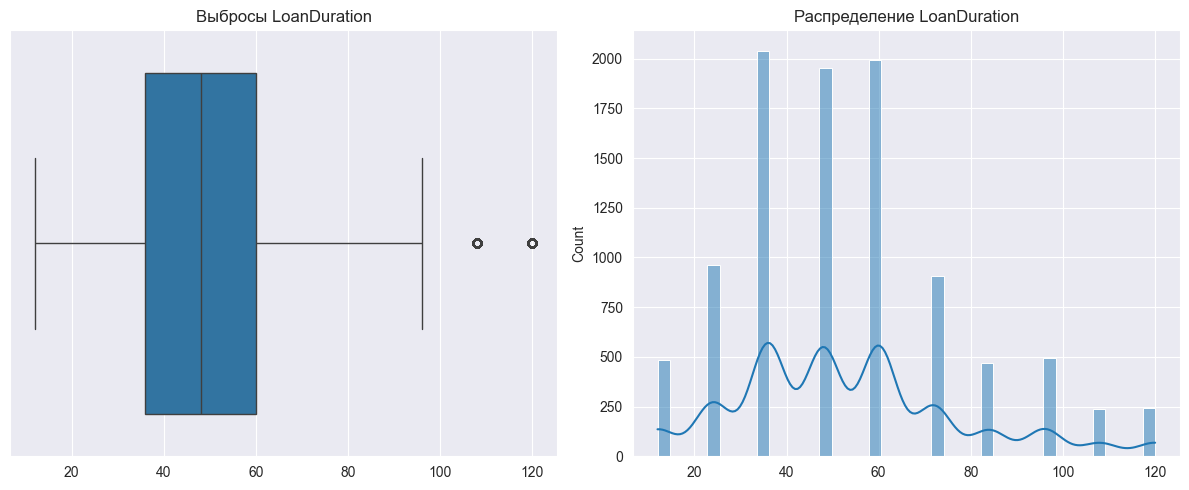

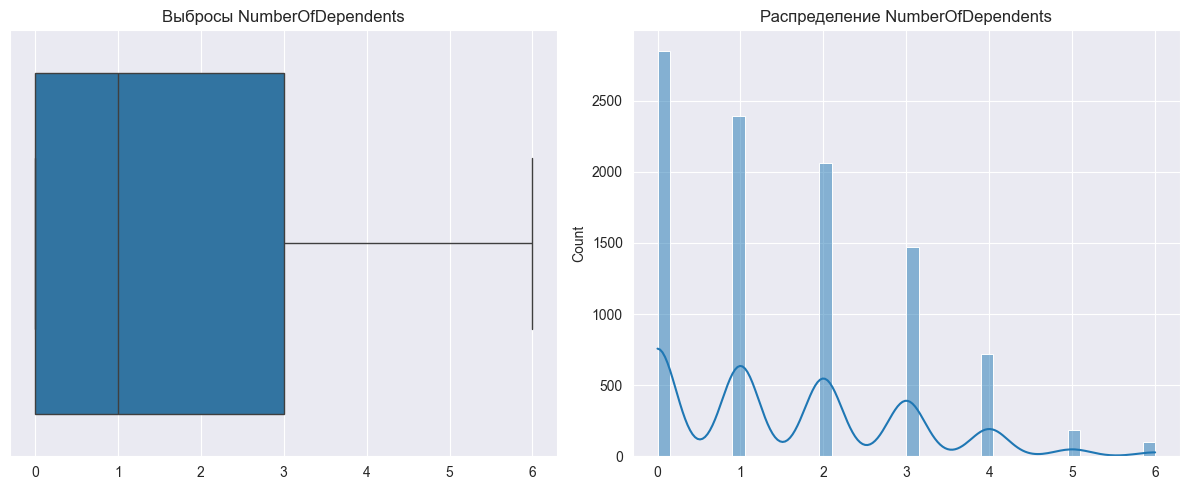

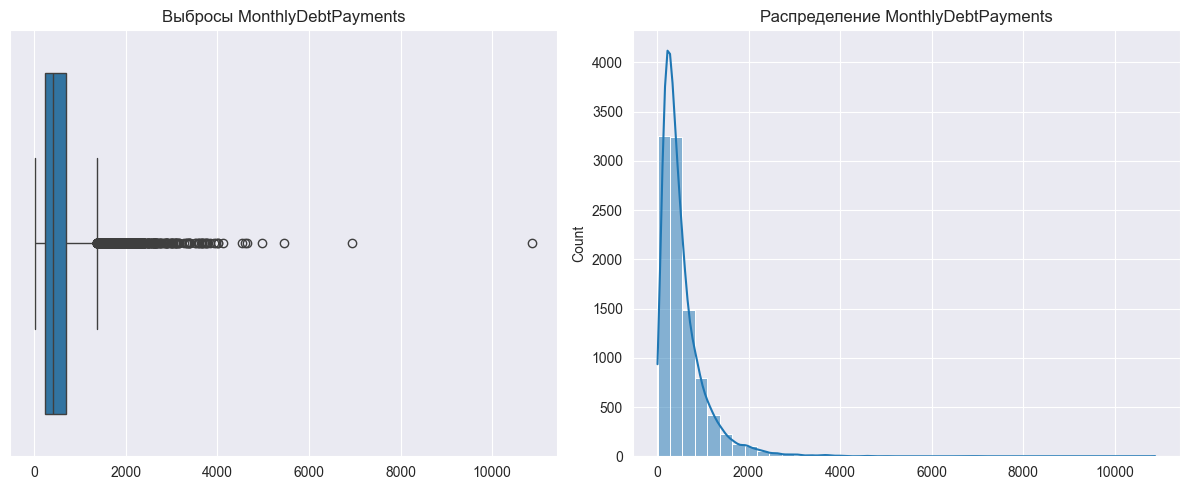

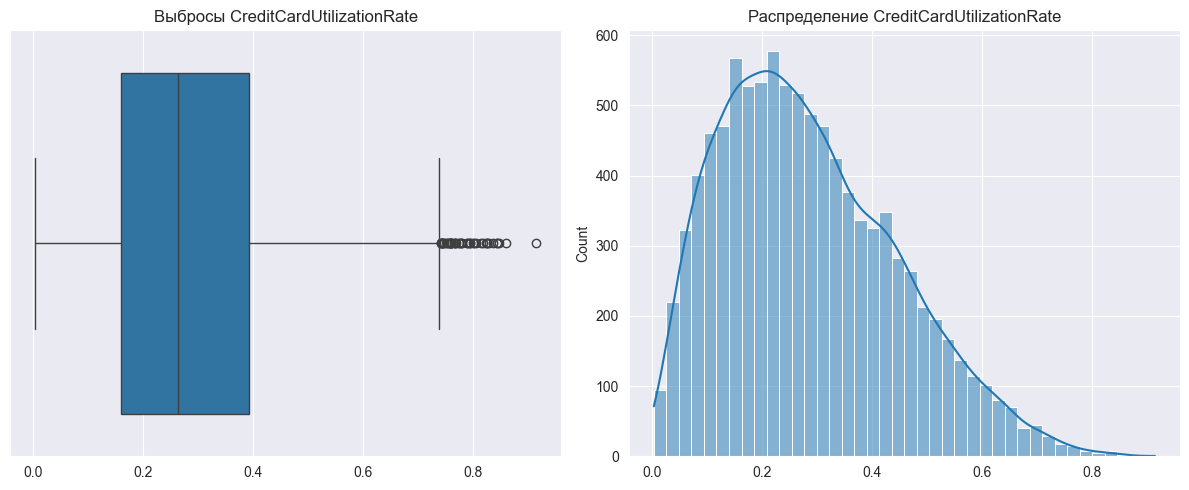

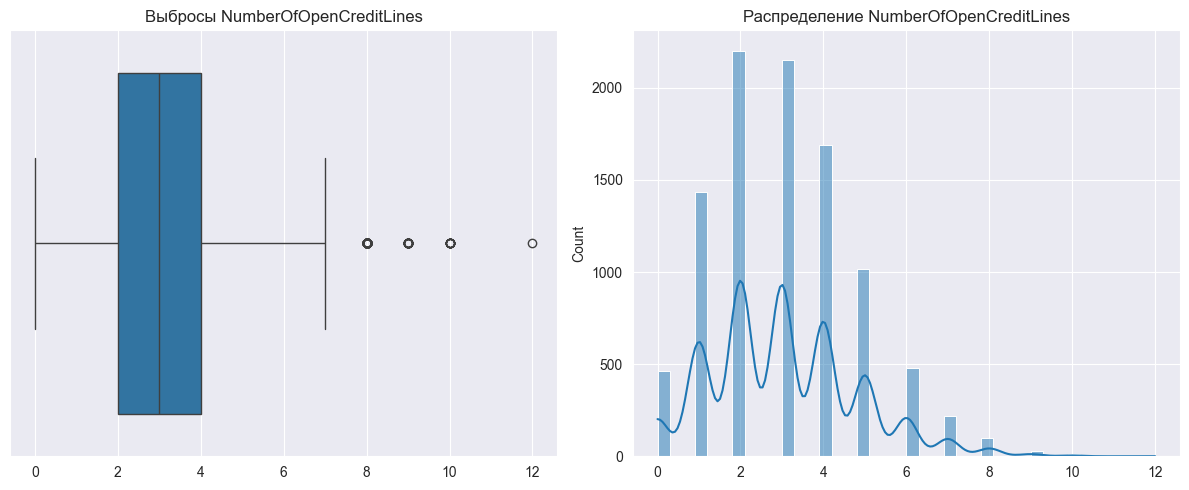

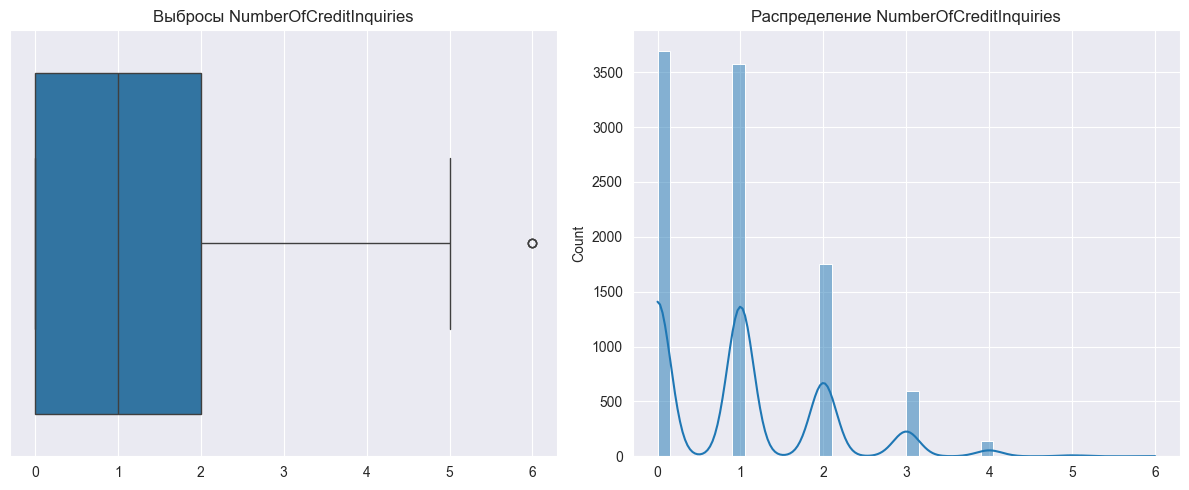

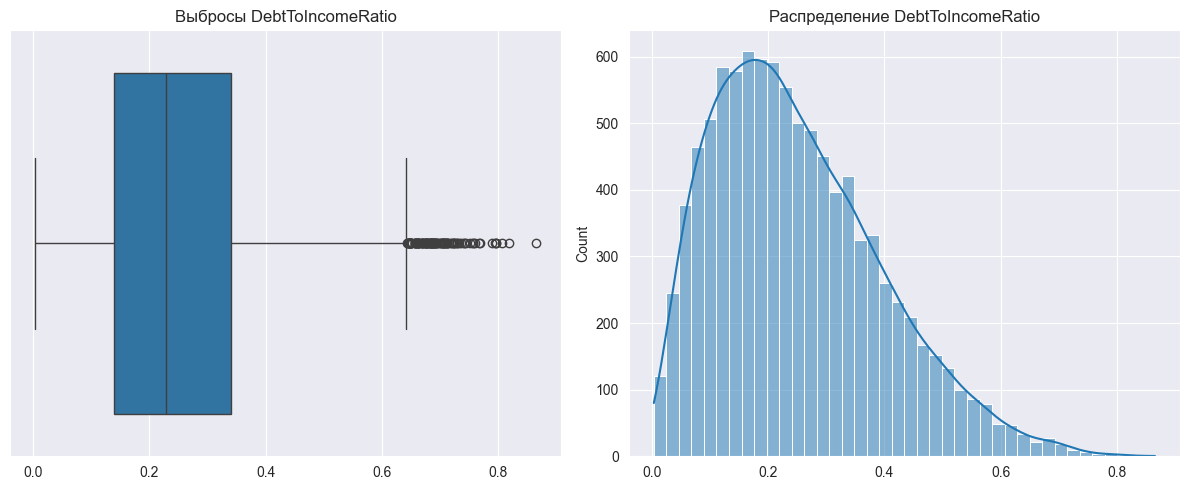

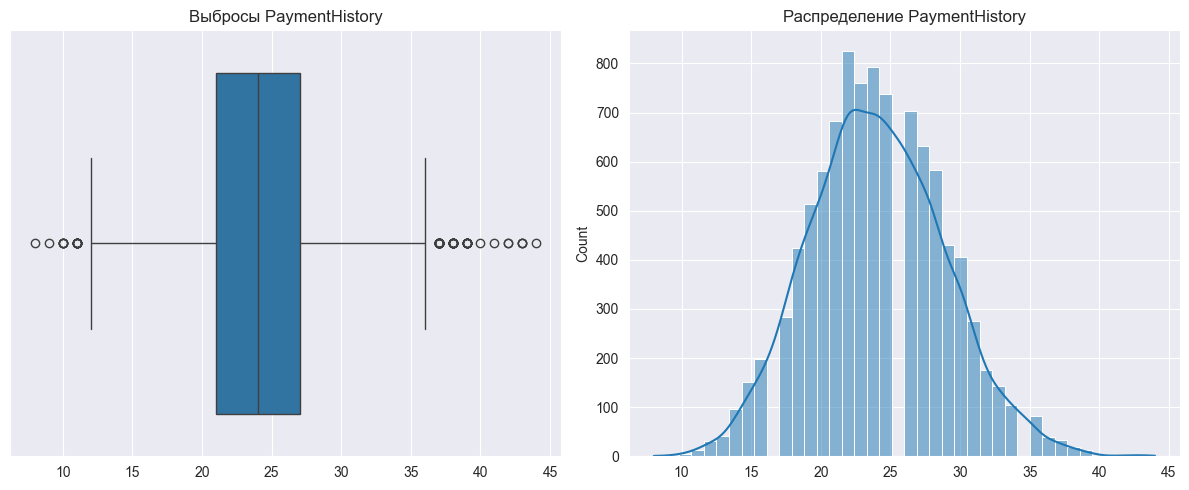

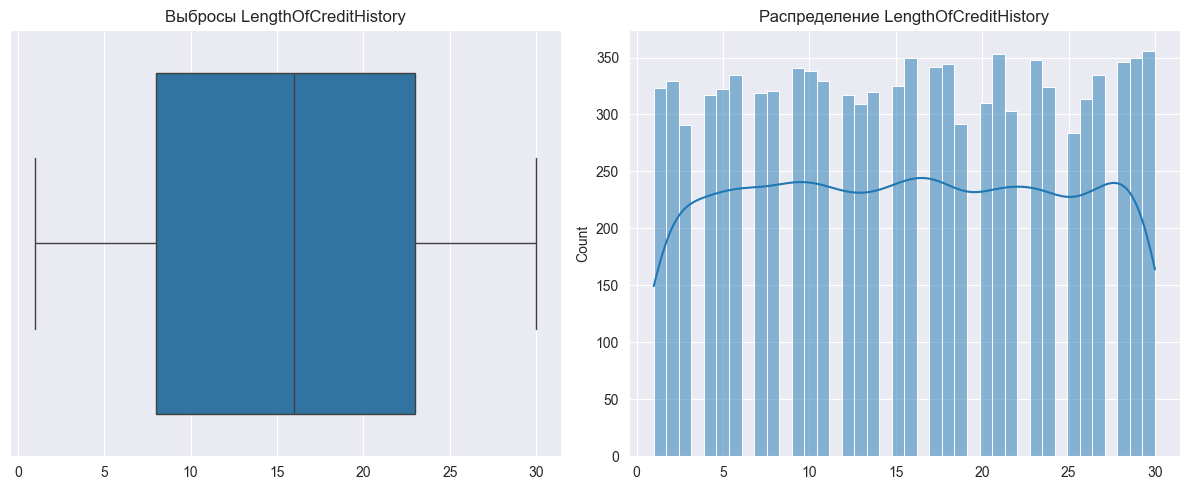

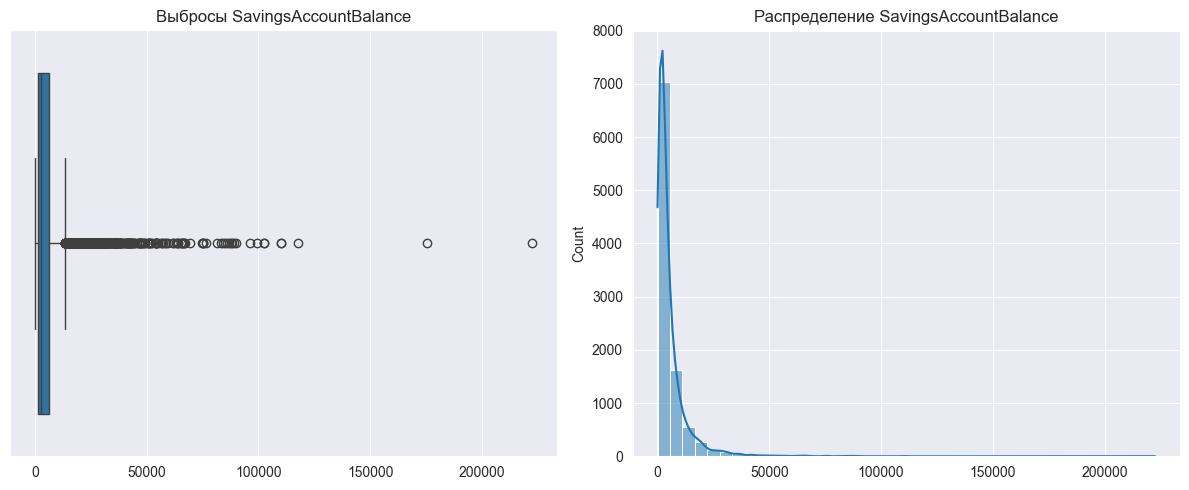

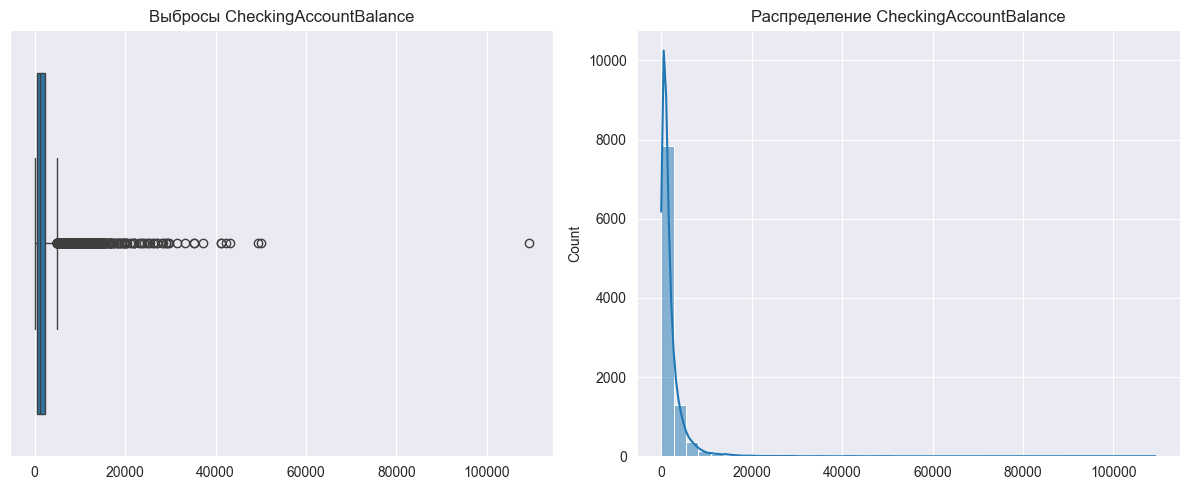

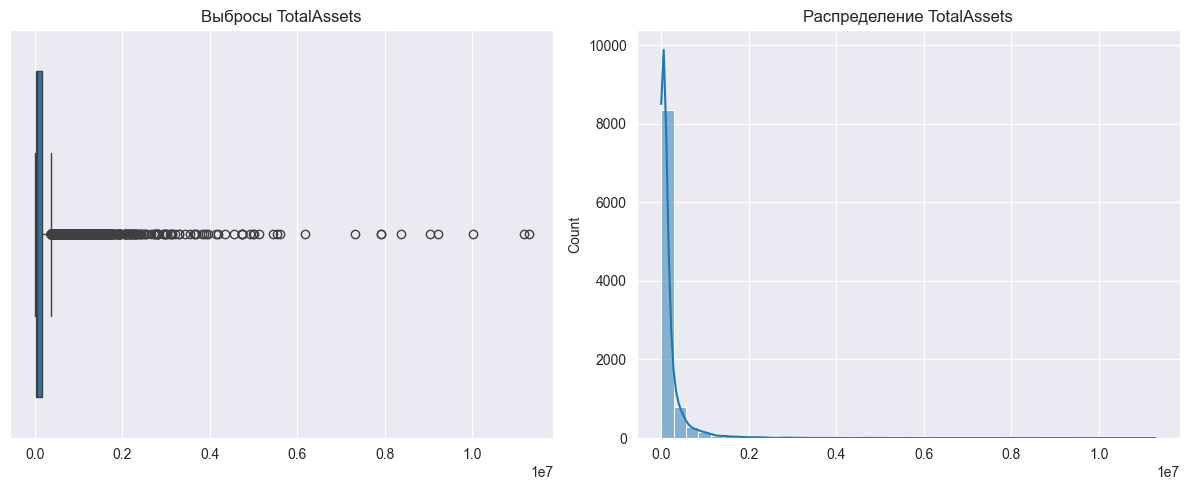

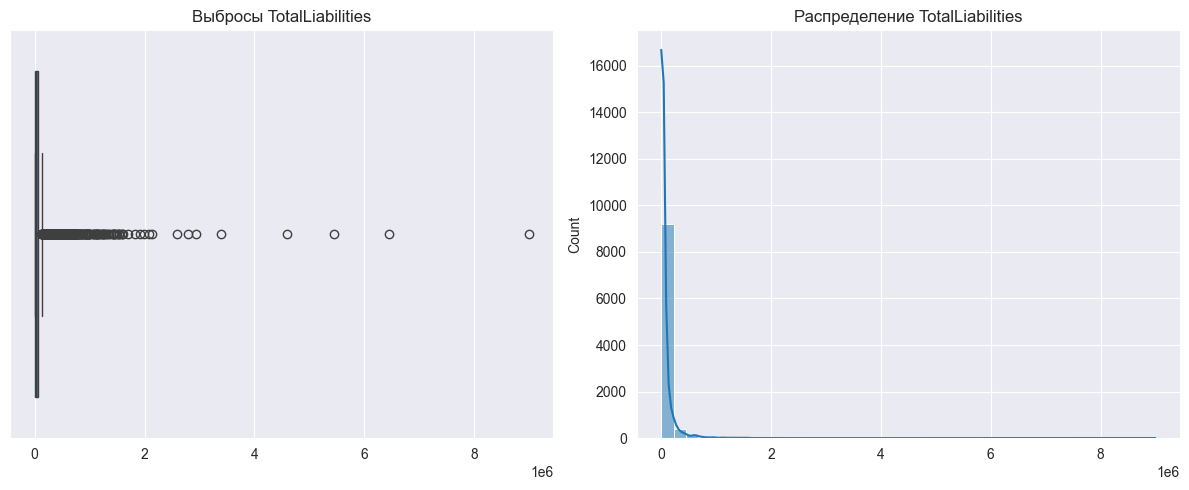

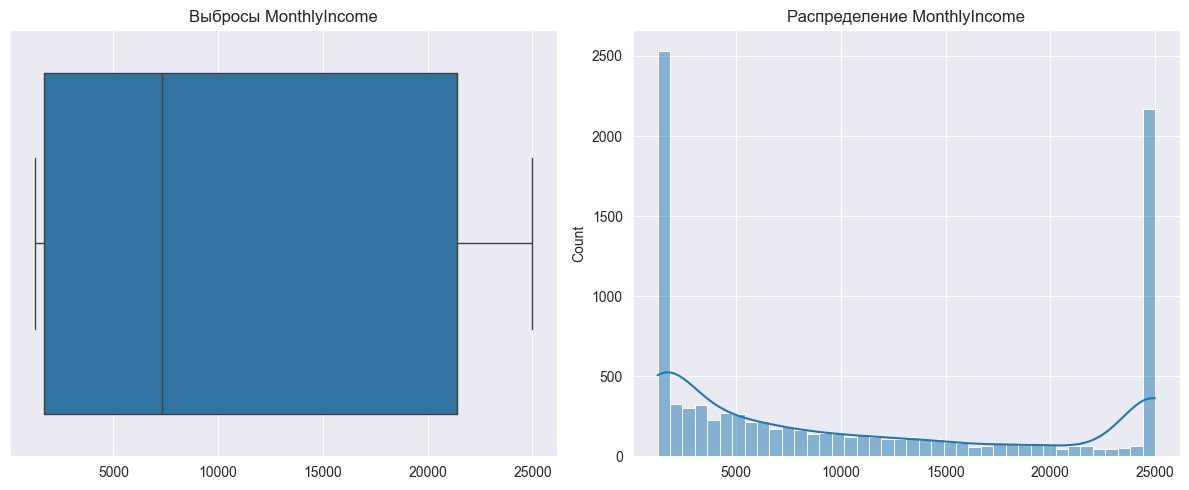

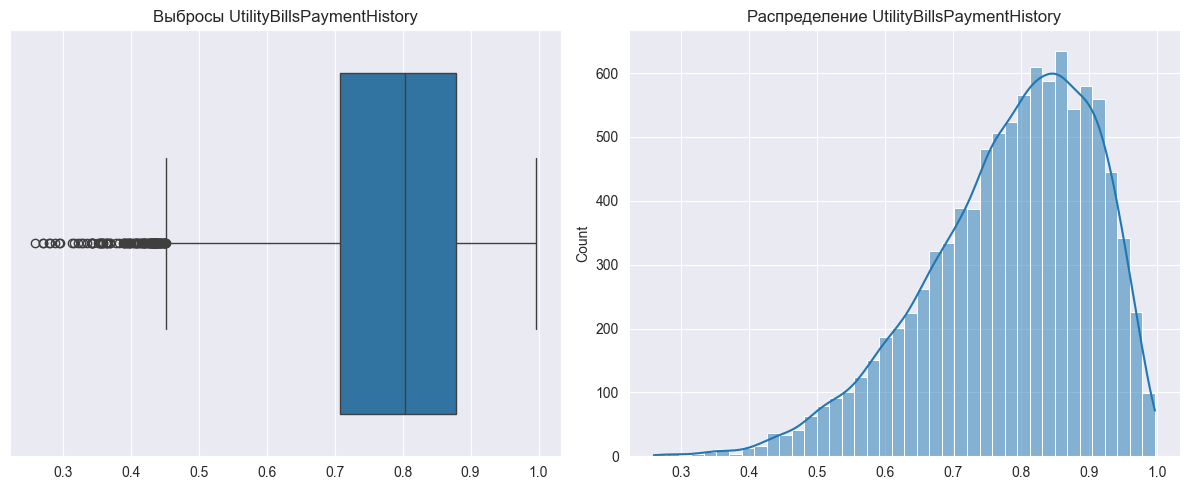

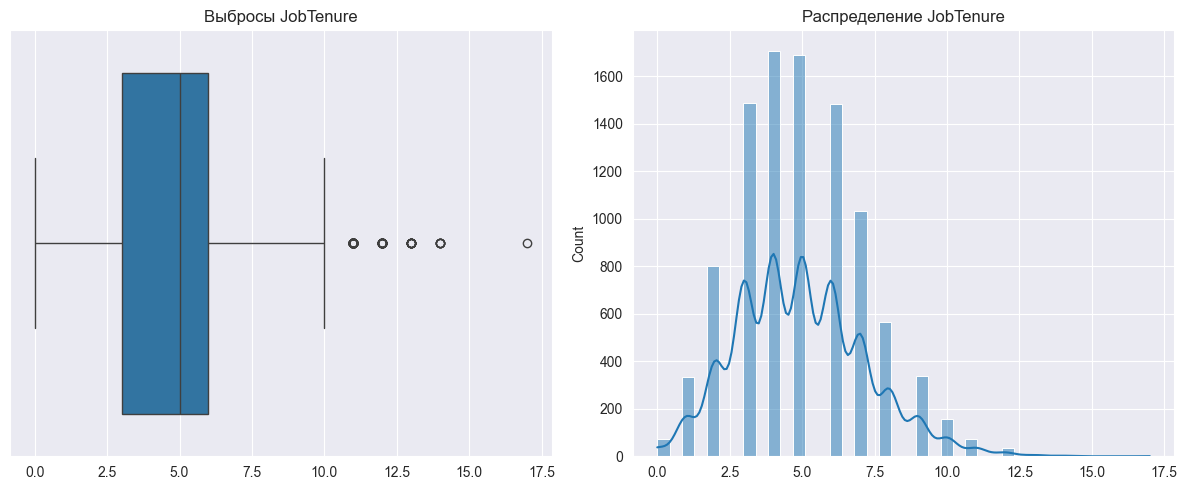

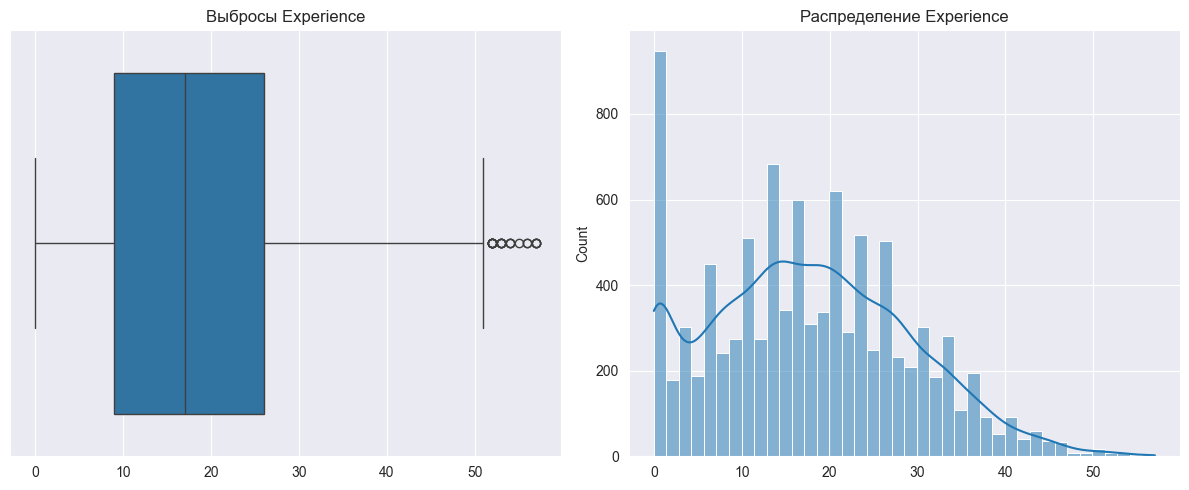

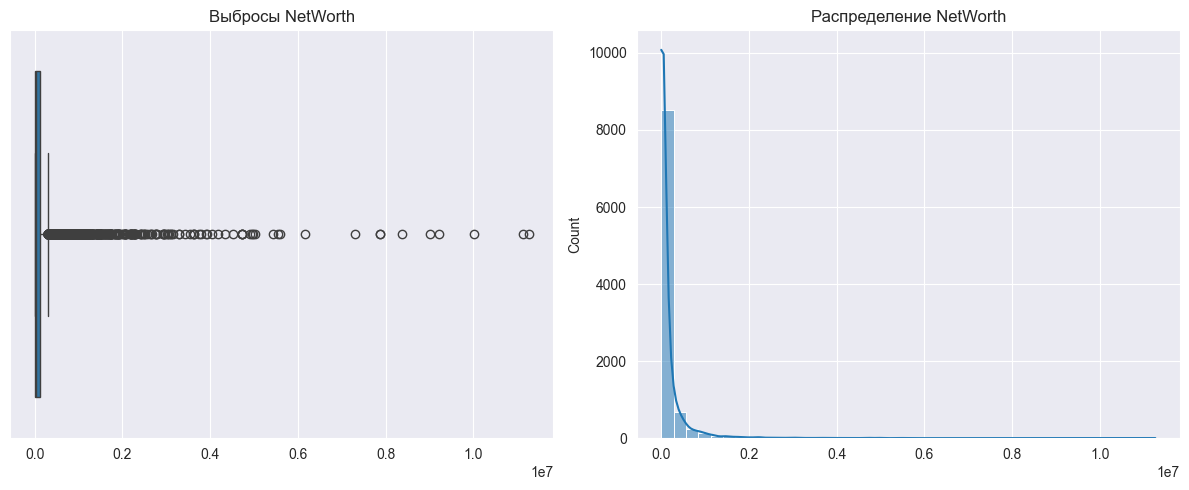

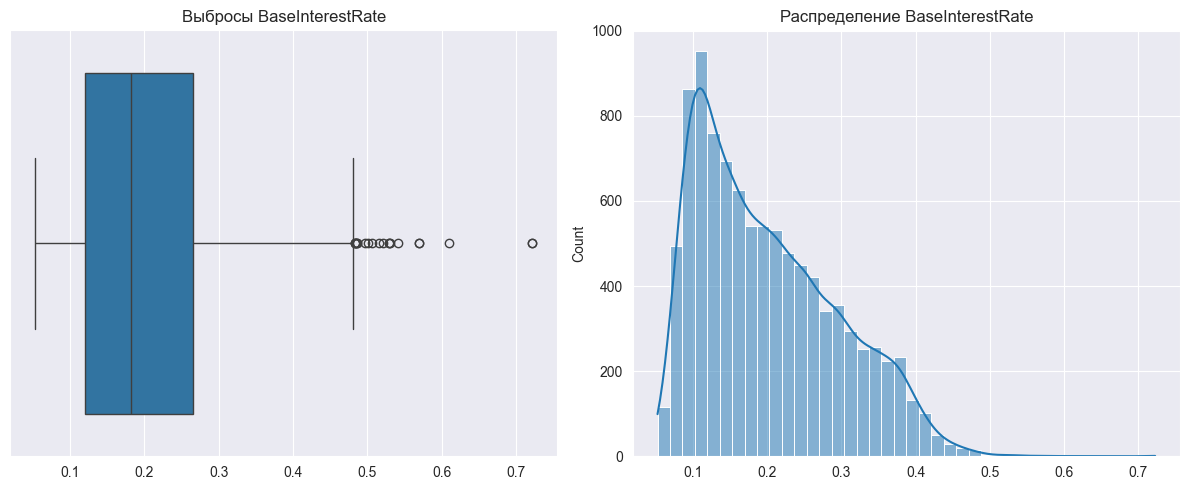

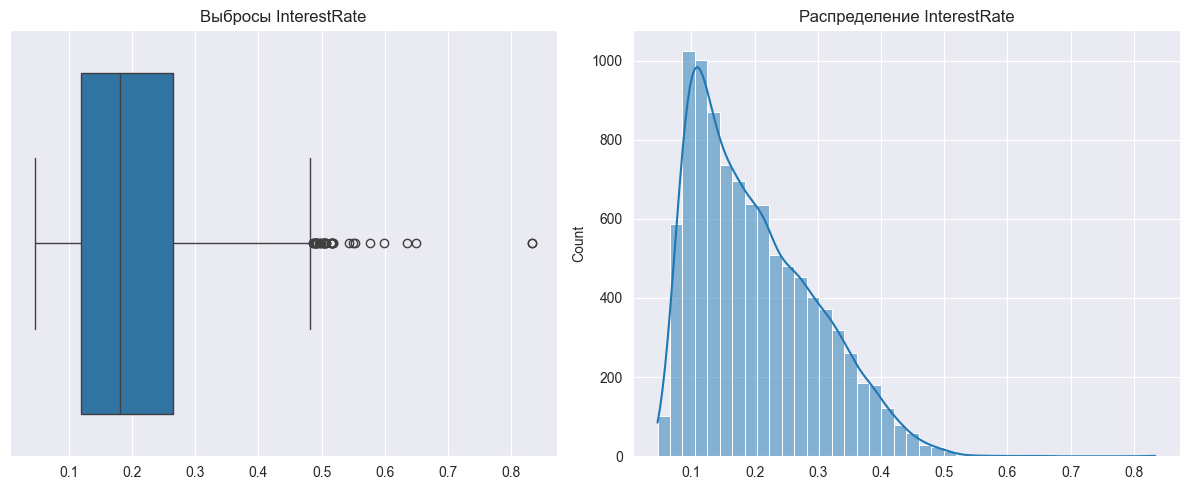

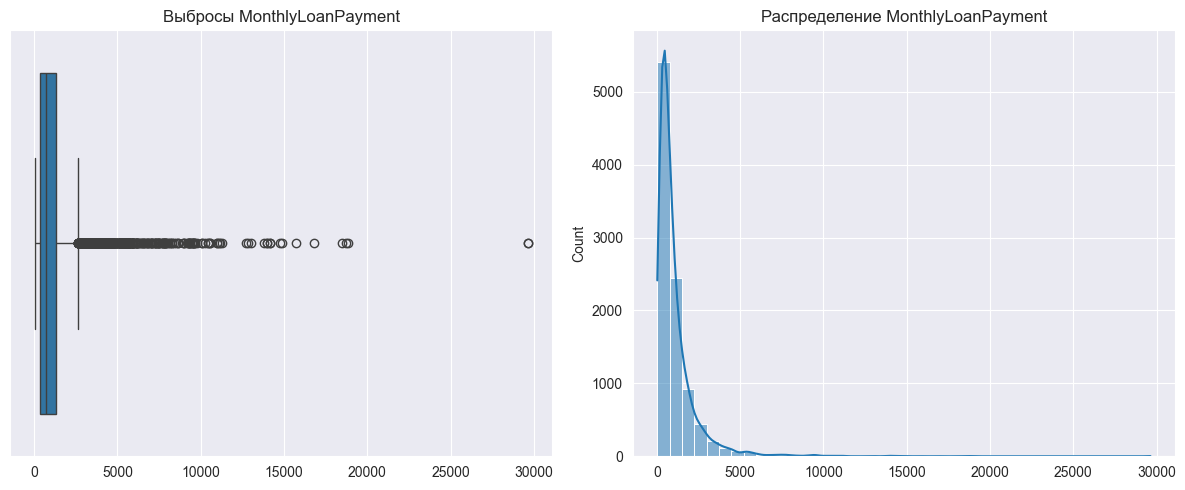

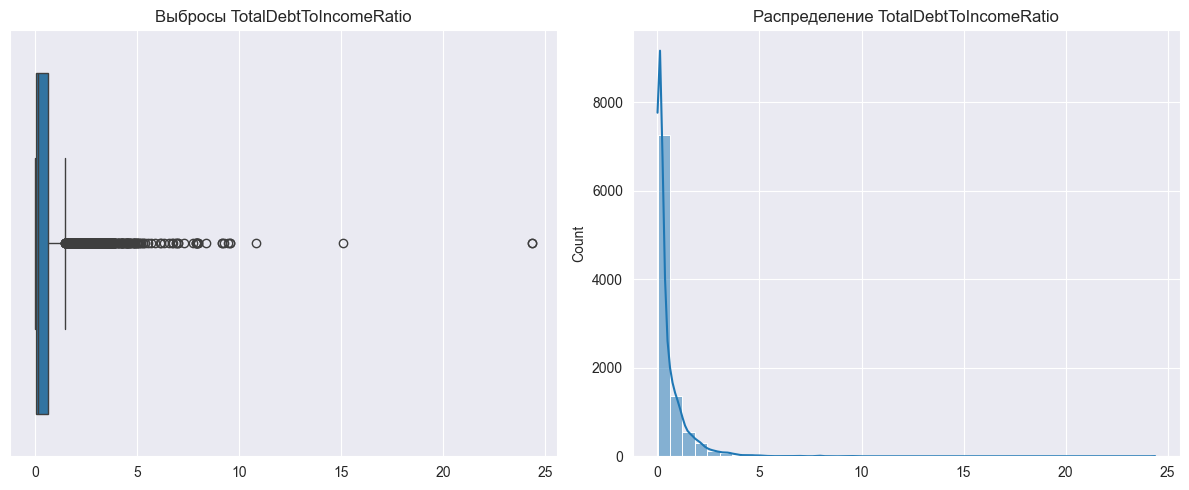

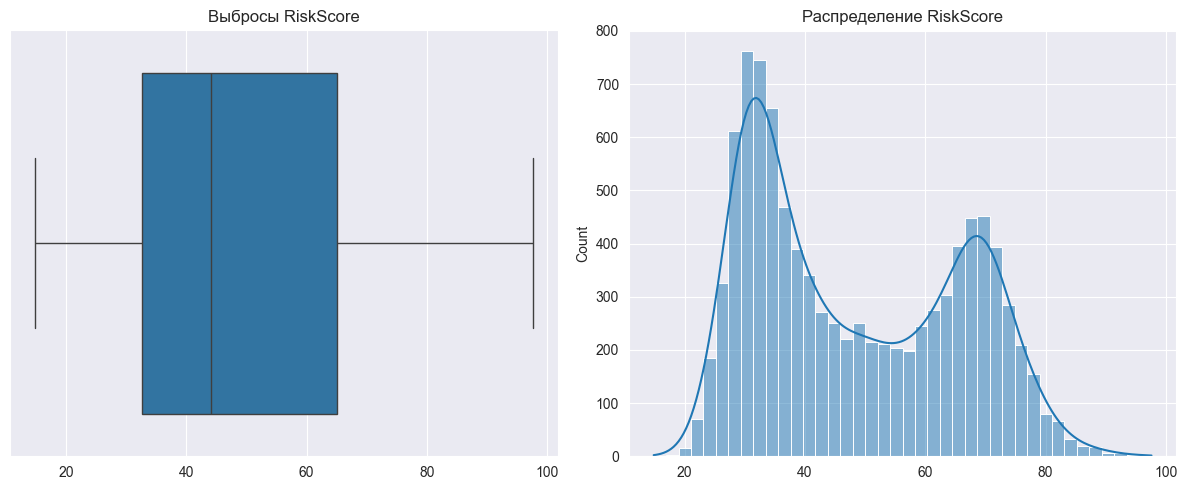

27


In [422]:
counter = 0
for col in numeric_cols:
    if col in pseudo_numeric:
        continue
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_[col])
    plt.title(f'Выбросы {col}')
    plt.xlabel('')


    plt.subplot(1, 2, 2)
    sns.histplot(df_[col], kde=True, bins=40)
    plt.title(f'Распределение {col}')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()
    counter += 1

print(counter)

Посмотрим количественно на категориальные признаки

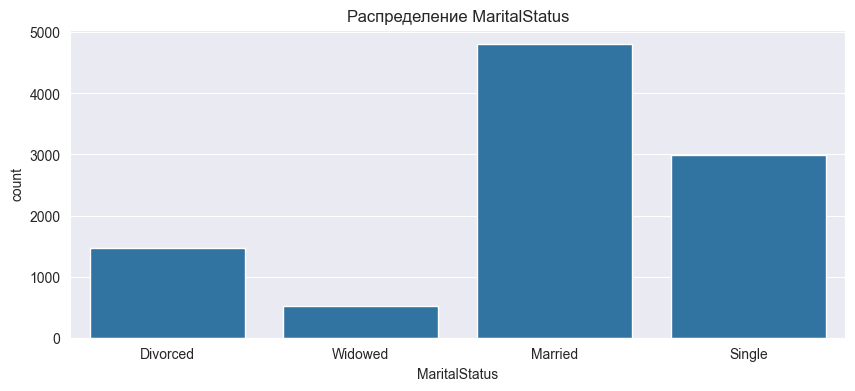

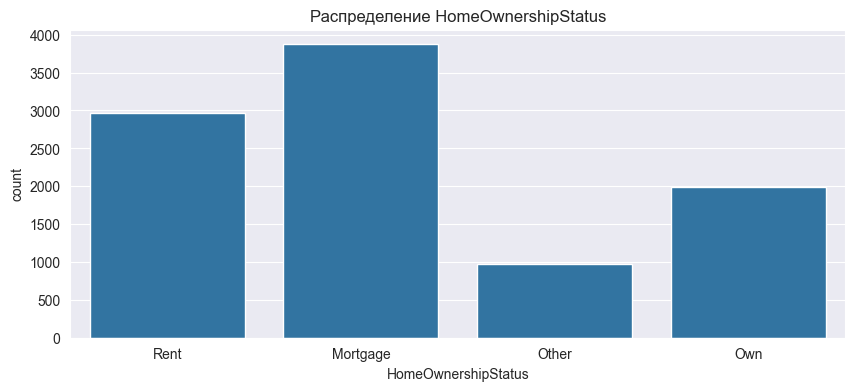

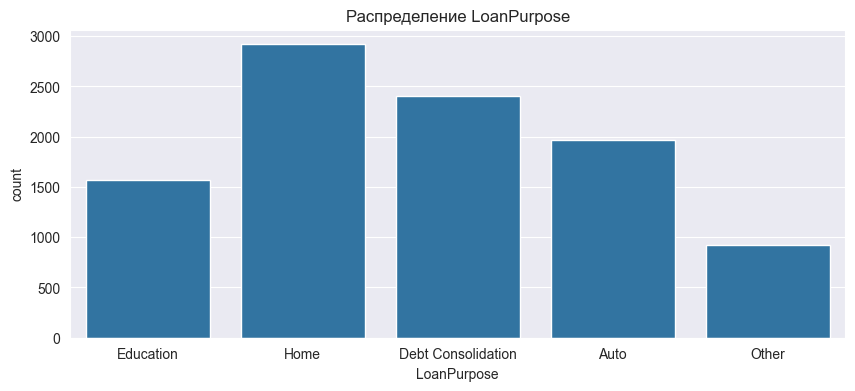

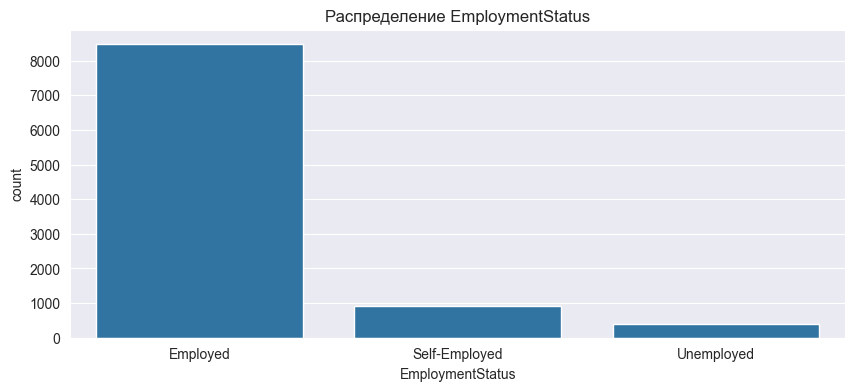

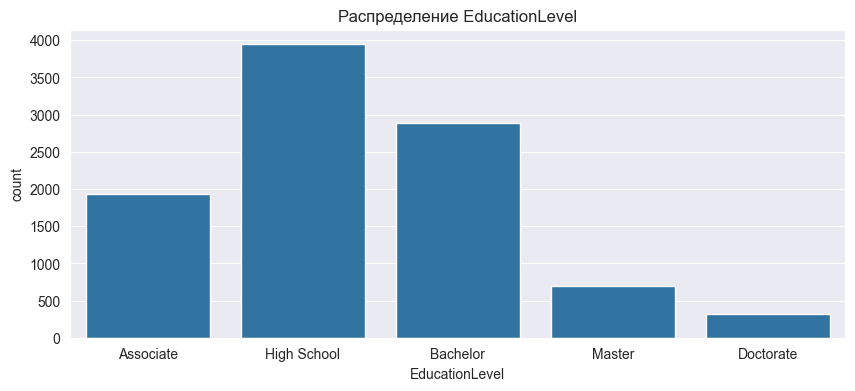

In [423]:
for col in categorical_cols:
    if col == 'ApplicationDate': # это дата время удалим в будущем
        continue
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_, x=col)
    plt.xticks(rotation=0)
    plt.title(f'Распределение {col}')
    plt.show()

Посмотрим на псевдо-числовые признаки и убедимся в этоми благодаря просмотру распредедения

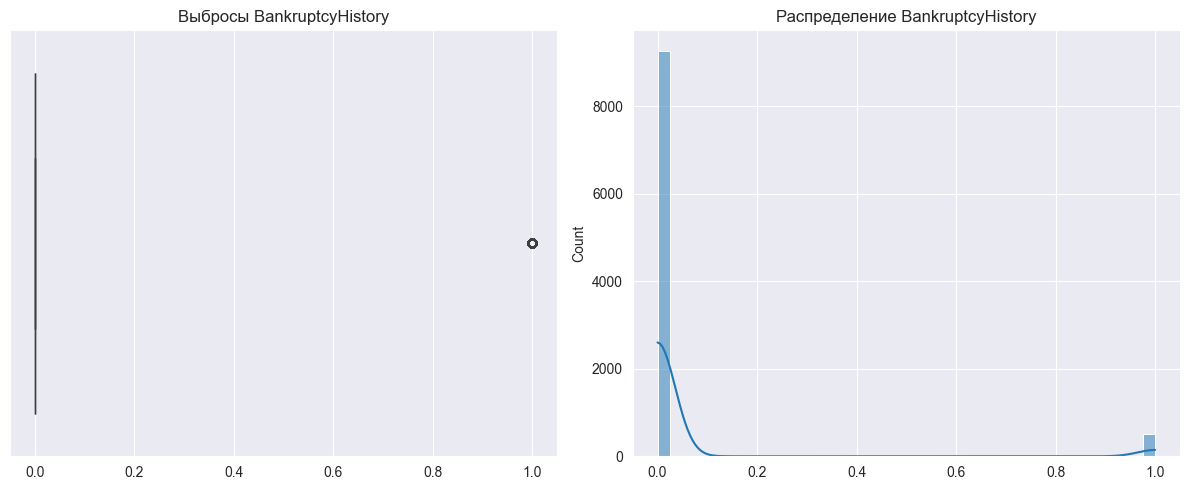

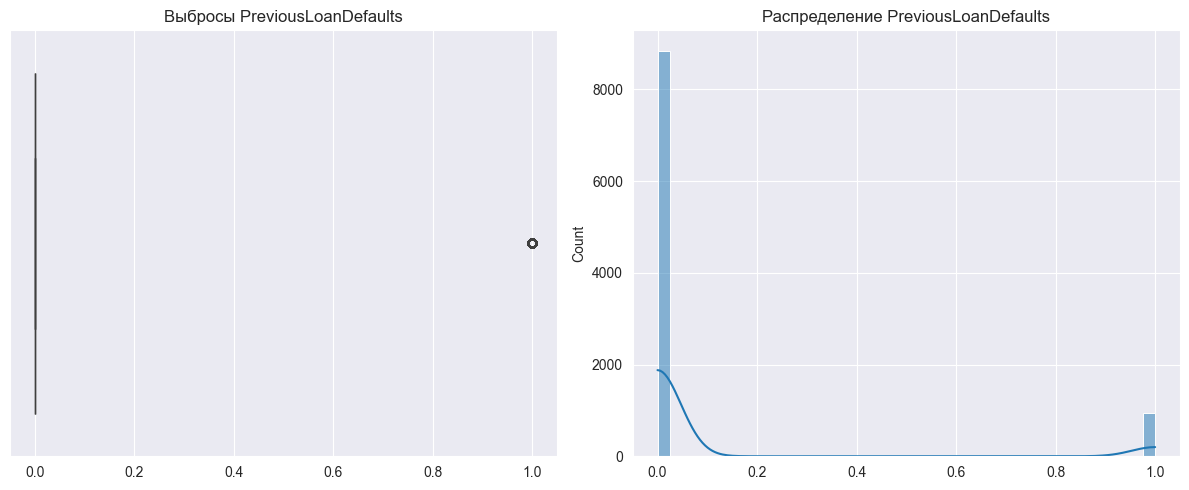

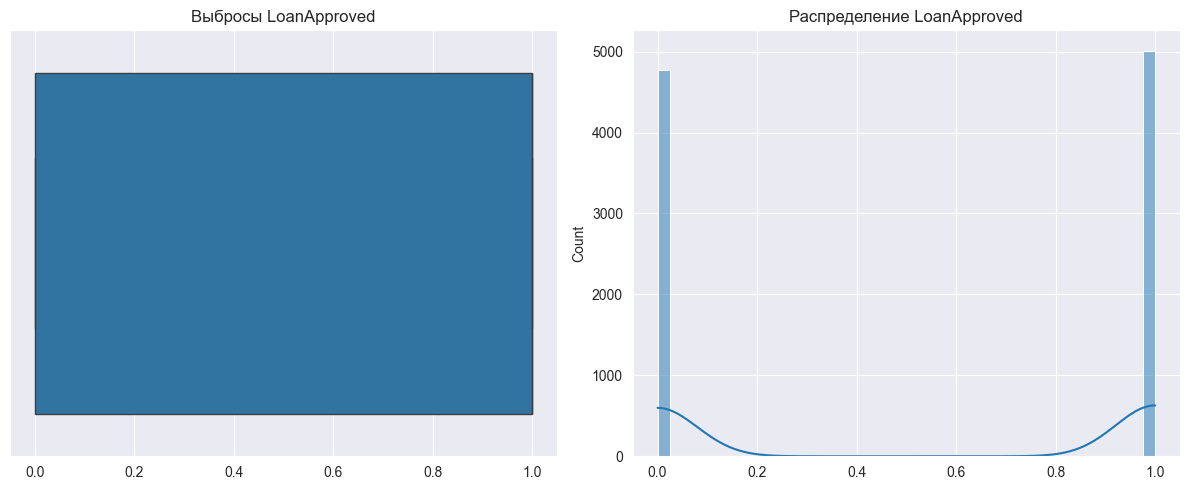

In [424]:
for col in pseudo_numeric:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_[col])
    plt.title(f'Выбросы {col}')
    plt.xlabel('')


    plt.subplot(1, 2, 2)
    sns.histplot(df_[col], kde=True, bins=40)
    plt.title(f'Распределение {col}')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()


8. Теперь будем разделять категориальные признаки на числовые или бинарные

In [425]:
print(categorical_cols)

df = df_.copy()

print(df.shape[1])

#разделю ApplicationDate на отдельные составляющие

df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
df['Year'] = df['ApplicationDate'].dt.year
df['Month'] = df['ApplicationDate'].dt.month
df['Day'] = df['ApplicationDate'].dt.day
df['DayOfWeek'] = df['ApplicationDate'].dt.dayofweek
df['DayOfYear'] = df['ApplicationDate'].dt.dayofyear

df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'])
df_test['Year'] = df_test['ApplicationDate'].dt.year
df_test['Month'] = df_test['ApplicationDate'].dt.month
df_test['Day'] = df_test['ApplicationDate'].dt.day
df_test['DayOfWeek'] = df_test['ApplicationDate'].dt.dayofweek
df_test['DayOfYear'] = df_test['ApplicationDate'].dt.dayofyear

print(df.shape[1])

df = df.drop('ApplicationDate', axis=1)
df_test = df_test.drop('ApplicationDate', axis=1)

print(df.shape[1])

print(df.head(3))

for col in categorical_cols:
    if col == "ApplicationDate":
        continue
    prefix = col
    df = pd.get_dummies(df, columns=[col], prefix=prefix)
    df_test = pd.get_dummies(df_test, columns=[col], prefix=prefix)



for col in pseudo_numeric:
    median_val = df[col].mean()
    print(col + " :   " + str(median_val))
    df[f'{col}_group'] = (df[col] > median_val)
    df_test[f'{col}_group'] = (df_test[col] > median_val)
    df.drop(col, axis=1, inplace=True)
    df_test.drop(col, axis=1, inplace=True)


print(df['LoanApproved_group'].head(3))

print(pseudo_numeric)


# unique_values = df['EducationLevel'].unique()
# print(f"Уникальные значения: {unique_values}")
# print(f"Количество уникальных значений: {len(unique_values)}")

['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
36
41
40
    Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration MaritalStatus  \
0  27.0       66829.0        549.0     17290.0          60.0      Divorced   
1  55.0      172147.0        850.0     16110.0          36.0       Widowed   
2  51.0      300000.0        850.0     38436.0          36.0       Married   

   NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0                 1.0                Rent               1095.0   
1                 1.0            Mortgage                211.0   
2                 0.0            Mortgage                546.0   

   CreditCardUtilizationRate  ...  InterestRate  MonthlyLoanPayment  \
0                   0.151985  ...      0.251465          508.970230   
1                   0.175693  ...      0.093173          514.675859   
2                   0.444605  ...      0.115443         1268.276385   

   TotalDebtToI

In [426]:
print(tabulate([(col, dtype) for col, dtype in zip(df.columns, df.dtypes)],
               headers=['Признак', 'Тип данных'], tablefmt='grid'))

+--------------------------------+--------------+
| Признак                        | Тип данных   |
+================================+==============+
| Age                            | float64      |
+--------------------------------+--------------+
| AnnualIncome                   | float64      |
+--------------------------------+--------------+
| CreditScore                    | float64      |
+--------------------------------+--------------+
| LoanAmount                     | float64      |
+--------------------------------+--------------+
| LoanDuration                   | float64      |
+--------------------------------+--------------+
| NumberOfDependents             | float64      |
+--------------------------------+--------------+
| MonthlyDebtPayments            | float64      |
+--------------------------------+--------------+
| CreditCardUtilizationRate      | float64      |
+--------------------------------+--------------+
| NumberOfOpenCreditLines        | float64      |


Отлично теперь у меня есть только числовые признаки в моих данных

Топ-10 самых коррелирующих признаков:
                         RiskScore
LoanApproved_group       -0.872722
CreditScore              -0.785425
MonthlyIncome            -0.770608
BaseInterestRate          0.758712
AnnualIncome             -0.758480
InterestRate              0.742940
TotalDebtToIncomeRatio    0.532384
BankruptcyHistory_group   0.177559
MonthlyLoanPayment        0.151459
TotalAssets              -0.145735




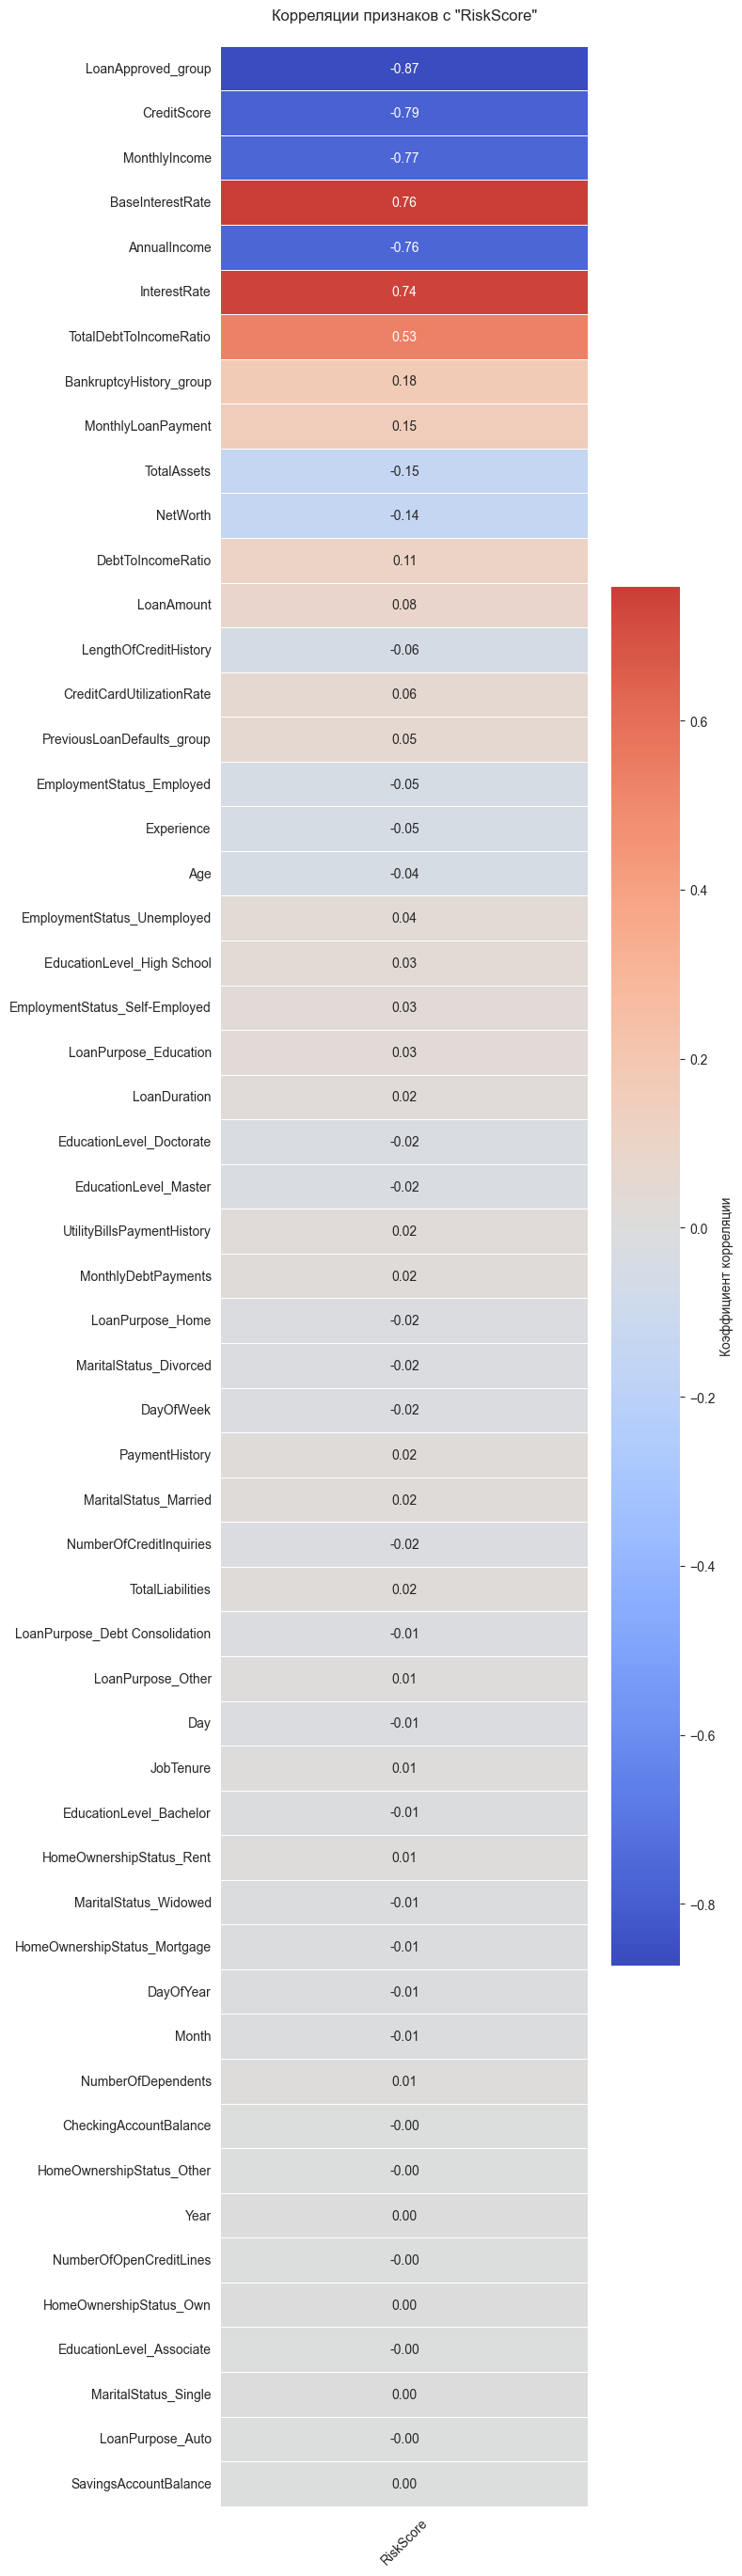

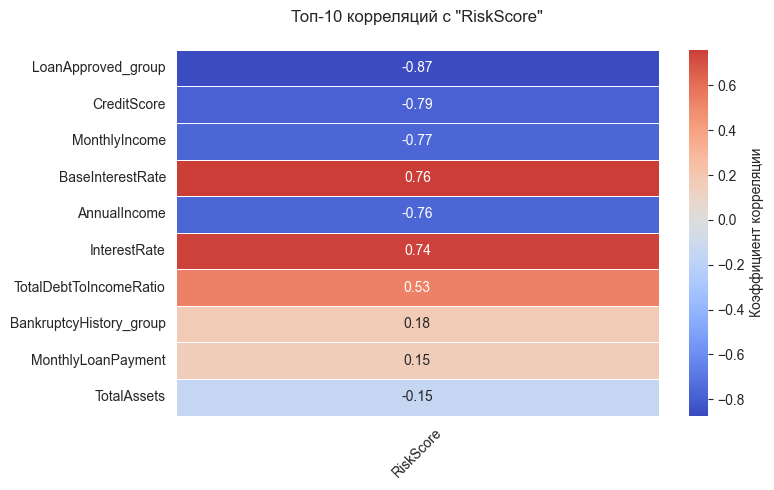

In [427]:
top_10 = []

cols = df.select_dtypes(include=['number', 'bool']).columns

if target_col not in cols:
    print(f"Ошибка: '{target_col}' не числовая переменная. Тип: {df[target_col].dtype}")
else:
    correlations = df[cols].corr()[[target_col]].drop(target_col)
    correlations = correlations.iloc[(-correlations[target_col].abs()).argsort()]

    print("Топ-10 самых коррелирующих признаков:")
    top_10 = correlations.head(10)
    print(top_10)
    print("\n" + "="*50 + "\n")


    plt.figure(figsize=(8, max(6, len(correlations)*0.5)))
    sns.heatmap(correlations,
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt=".2f",
                linewidths=0.5,
                cbar_kws={'label': 'Коэффициент корреляции'})

    plt.title(f'Корреляции признаков с "{target_col}"', pad=20)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.heatmap(top_10,
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt=".2f",
                linewidths=0.5,
                cbar_kws={'label': 'Коэффициент корреляции'})
    plt.title(f'Топ-10 корреляций с "{target_col}"', pad=20)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [428]:
print(top_10)

                         RiskScore
LoanApproved_group       -0.872722
CreditScore              -0.785425
MonthlyIncome            -0.770608
BaseInterestRate          0.758712
AnnualIncome             -0.758480
InterestRate              0.742940
TotalDebtToIncomeRatio    0.532384
BankruptcyHistory_group   0.177559
MonthlyLoanPayment        0.151459
TotalAssets              -0.145735


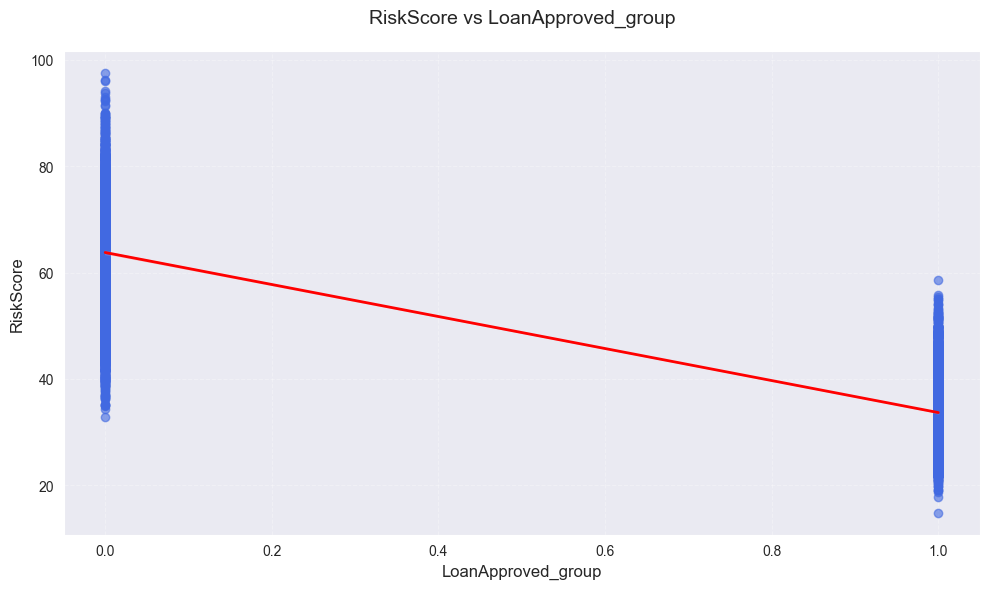

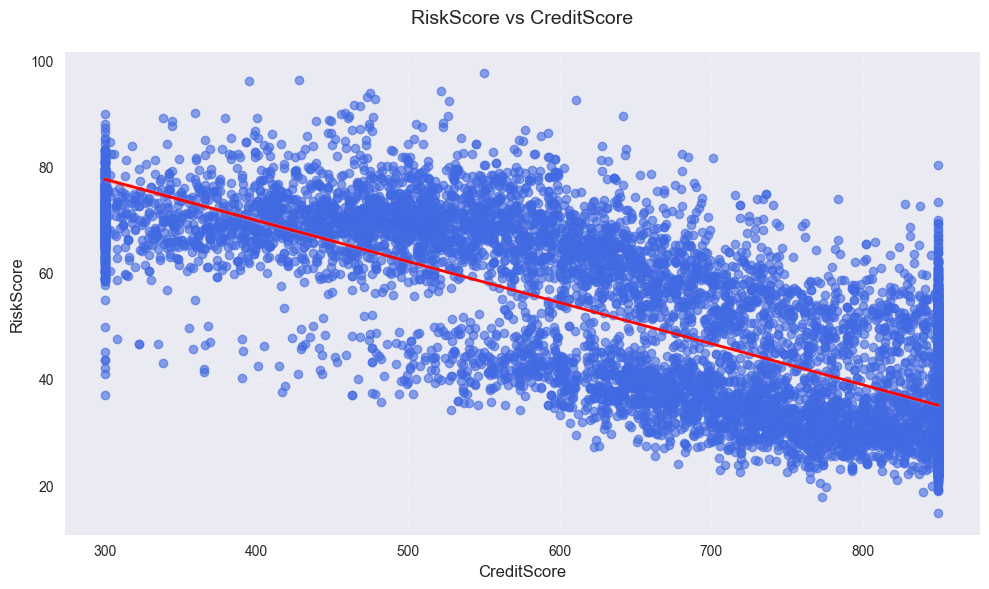

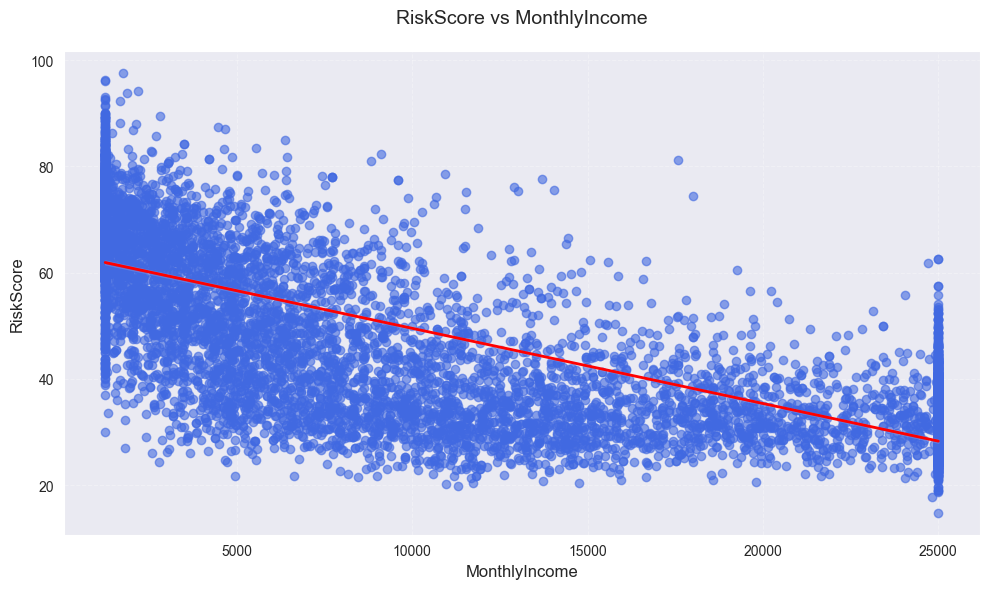

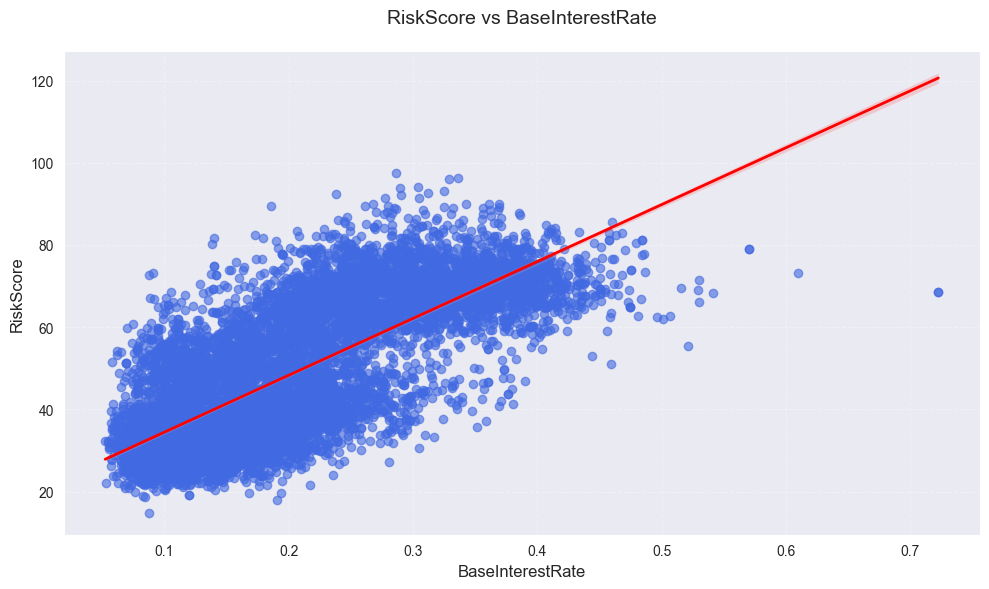

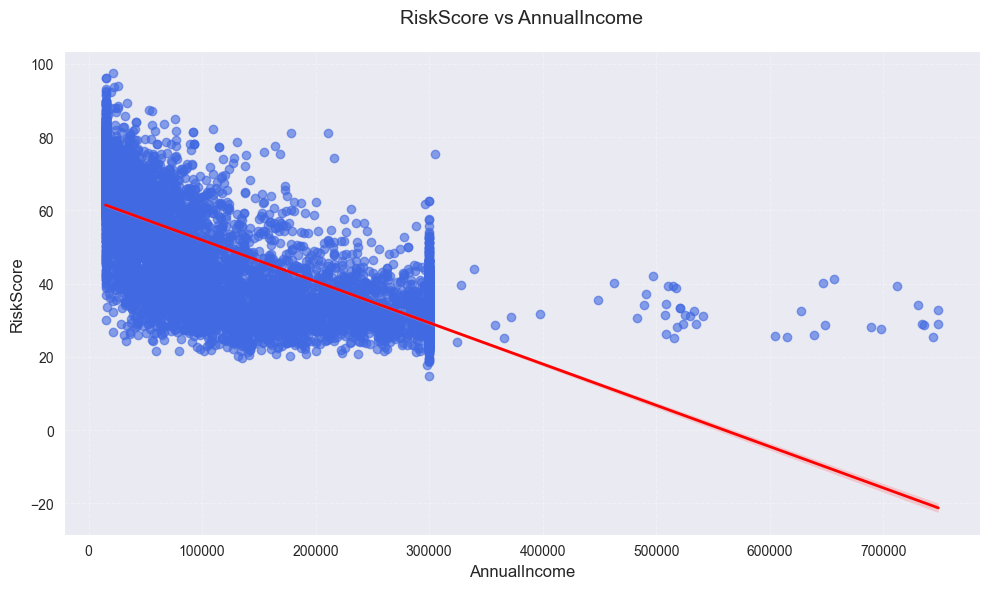

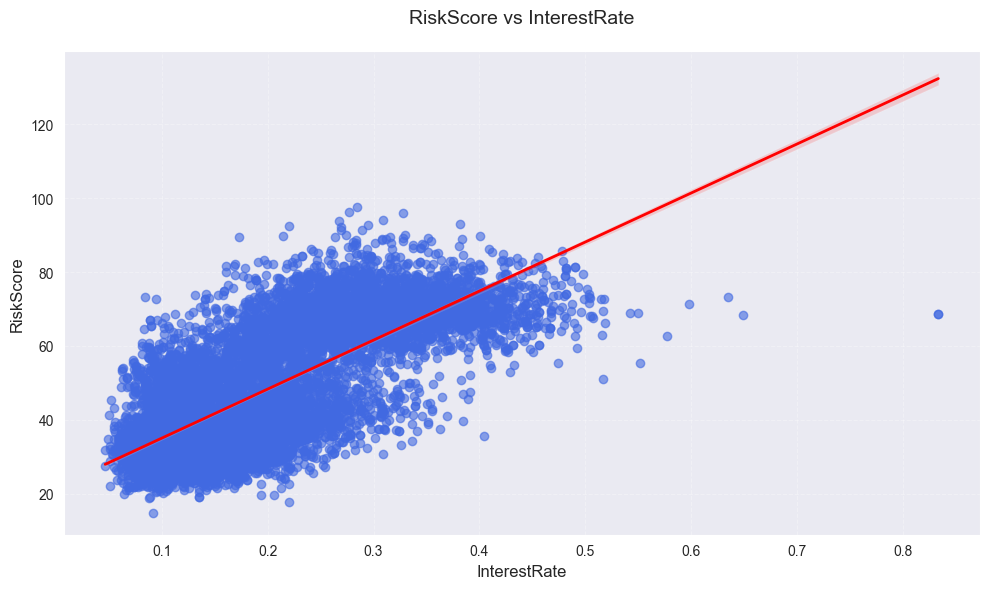

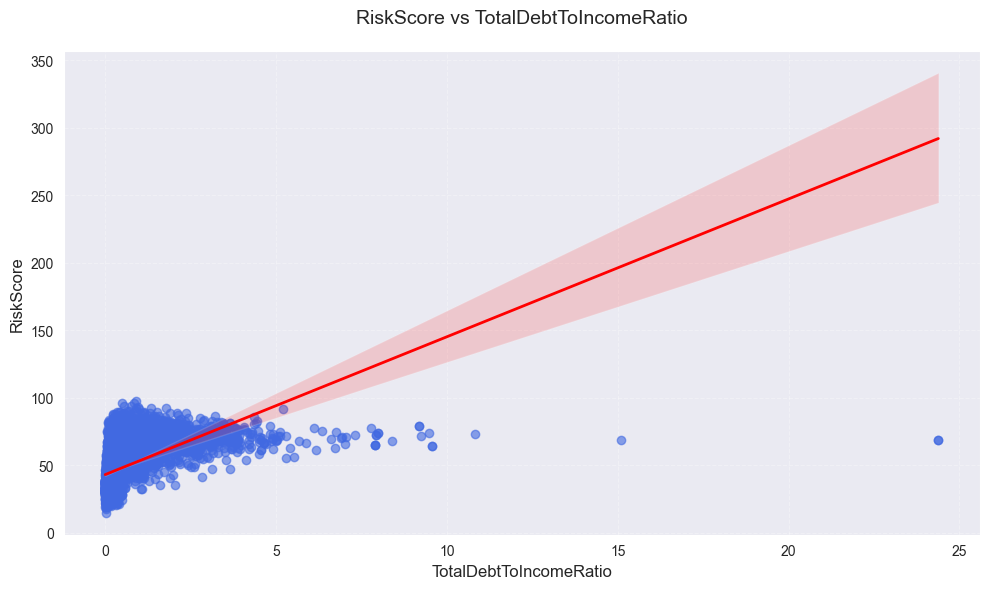

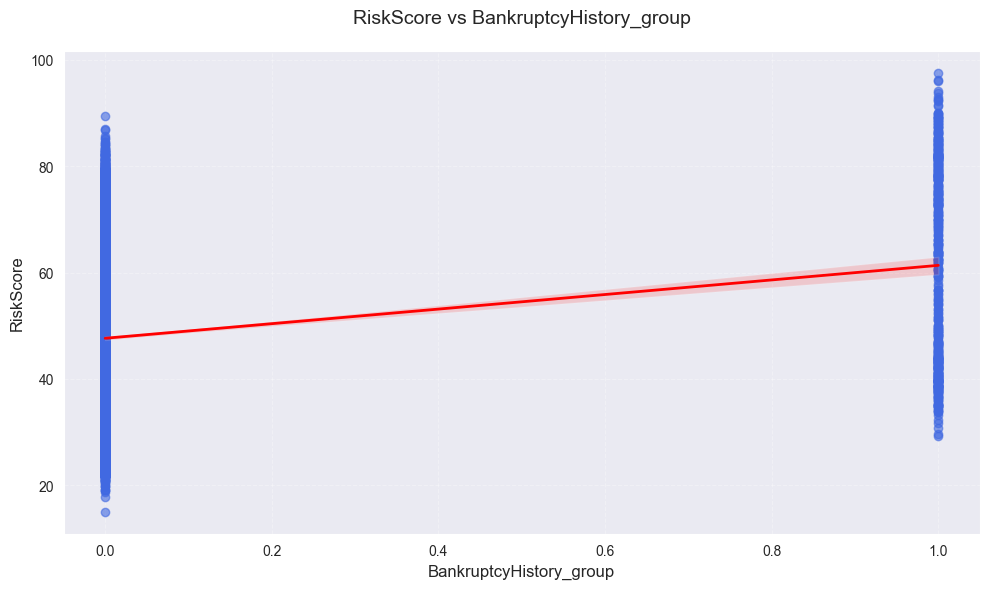

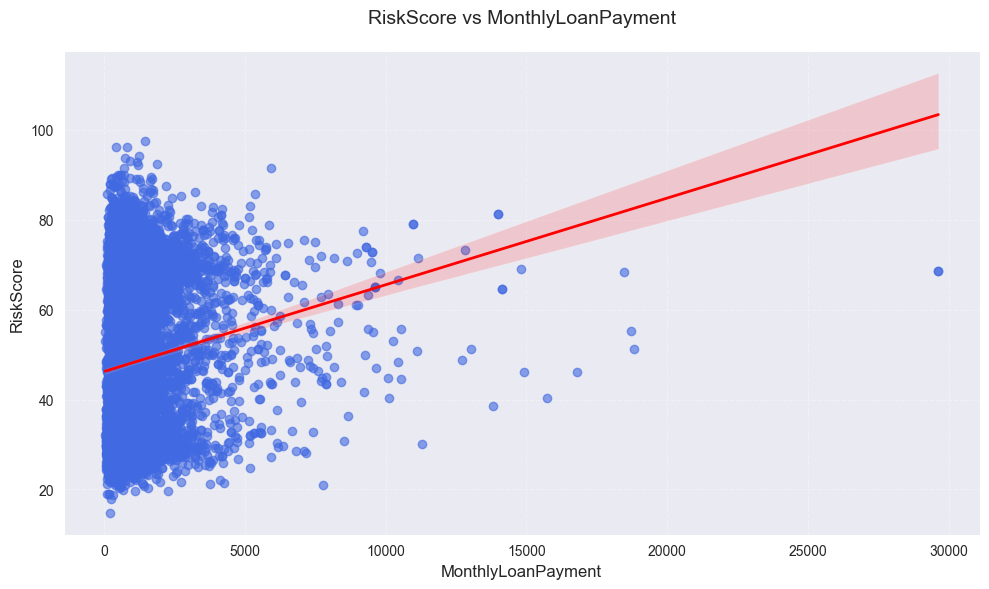

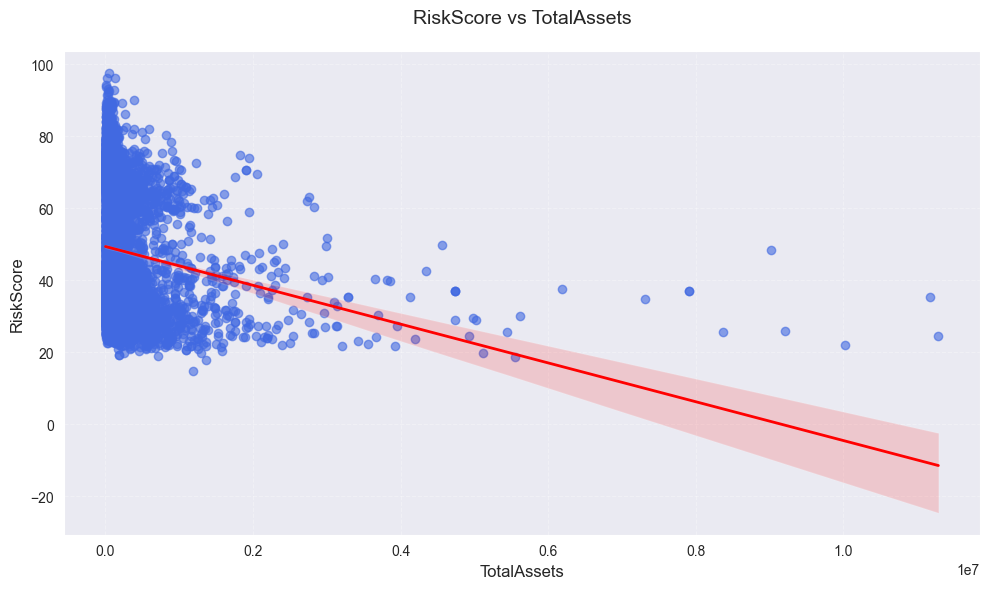

In [429]:
for feature in top_10.index:
    plt.figure(figsize=(10, 6))

    plt.scatter(
        x=df[feature],
        y=df[target_col],
        alpha=0.6,
        color='royalblue'
    )

    sns.regplot(
        x=feature,
        y=target_col,
        data=df,
        scatter=False,
        color='red',
        line_kws={'linewidth': 2}
    )


    plt.title(f'{target_col} vs {feature}', fontsize=14, pad=20)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target_col, fontsize=12)


    plt.grid(True, linestyle='--', alpha=0.3)


    plt.tight_layout()
    plt.show()

                         RiskScore
LoanApproved_group       -0.872722
CreditScore              -0.785425
MonthlyIncome            -0.770608
BaseInterestRate          0.758712
AnnualIncome             -0.758480
InterestRate              0.742940
TotalDebtToIncomeRatio    0.532384
BankruptcyHistory_group   0.177559
MonthlyLoanPayment        0.151459
TotalAssets              -0.145735


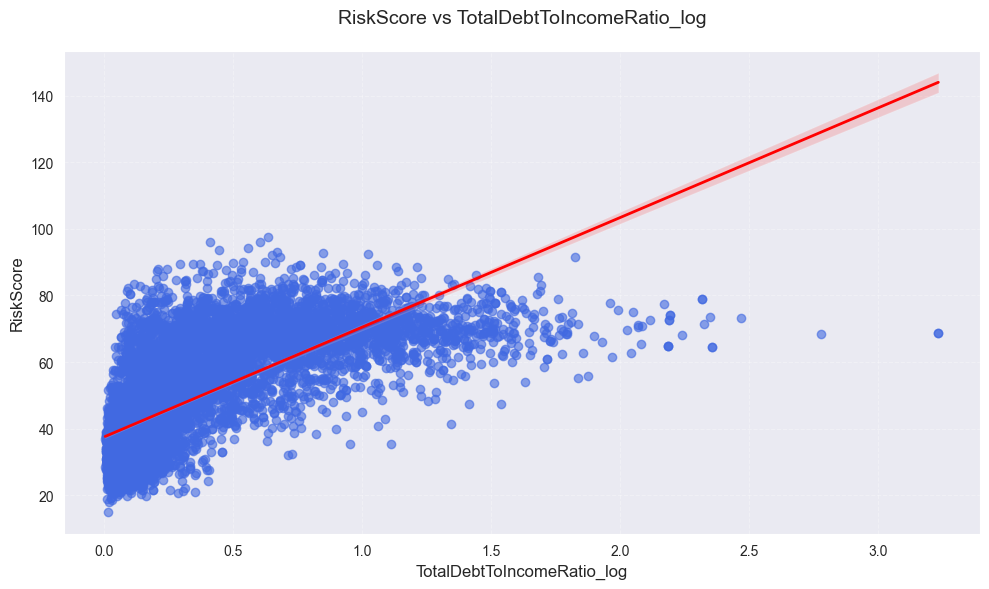

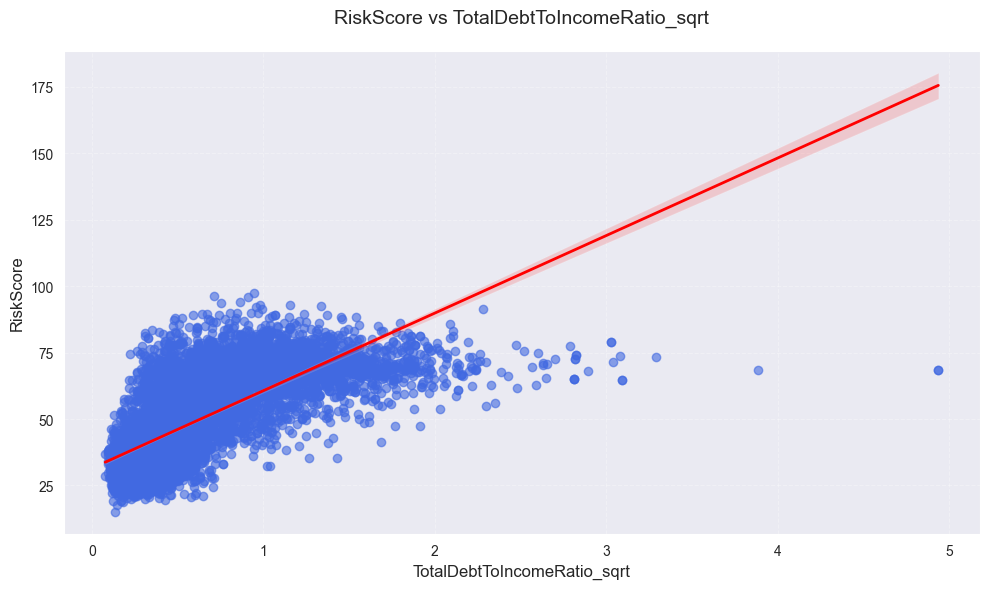

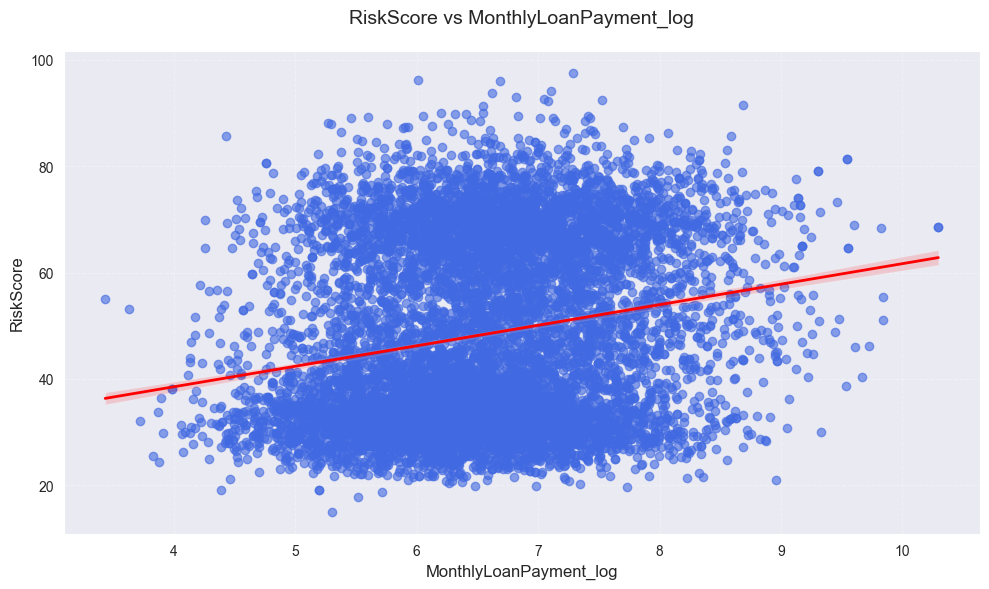

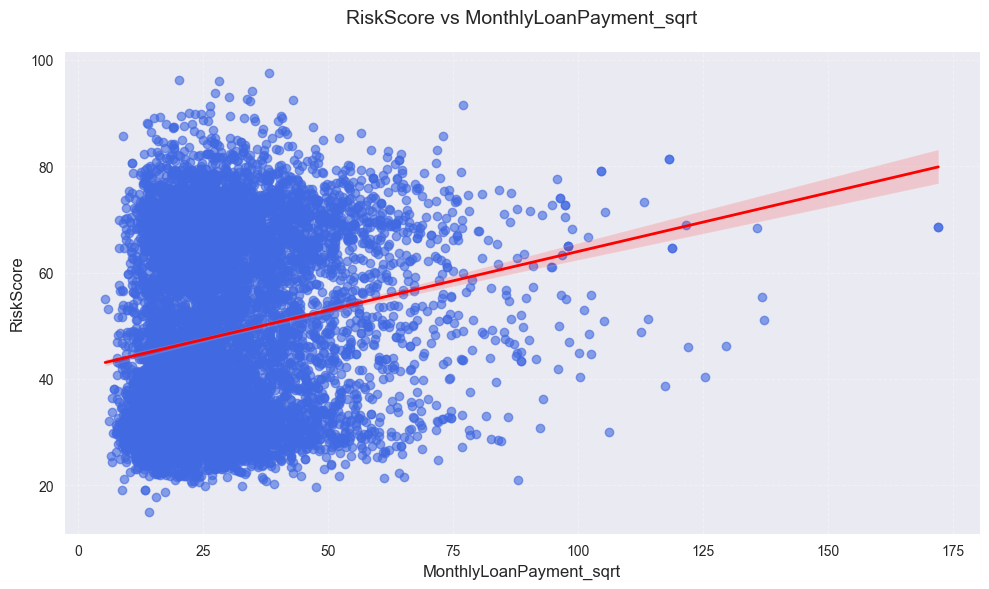

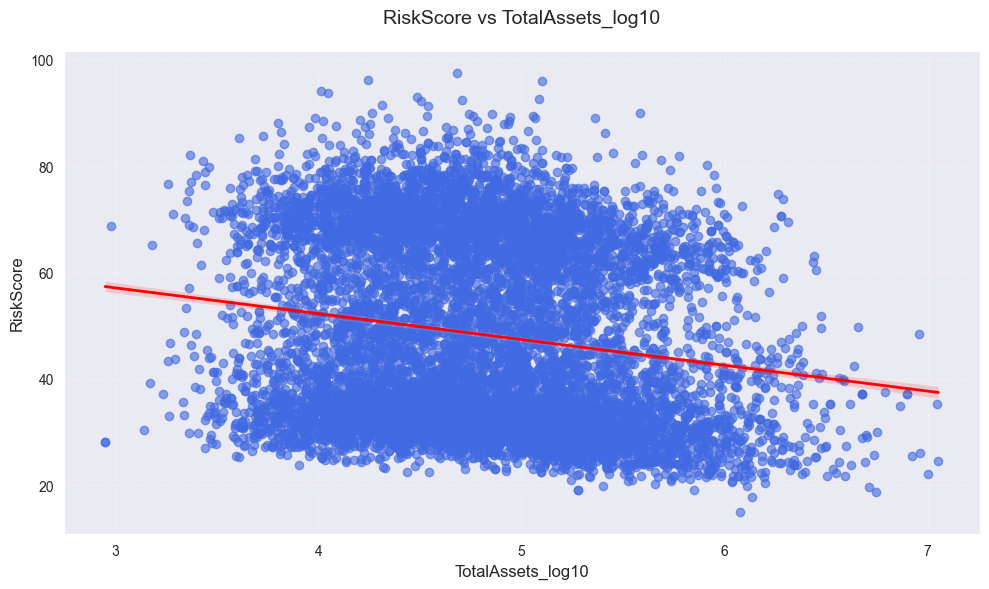

In [430]:
print(top_10)

df['TotalDebtToIncomeRatio_log'] = np.log1p(df['TotalDebtToIncomeRatio'])
df['TotalDebtToIncomeRatio_sqrt'] = np.sqrt(df['TotalDebtToIncomeRatio'])
df['MonthlyLoanPayment_log'] = np.log1p(df['MonthlyLoanPayment'])
df['MonthlyLoanPayment_sqrt'] = np.sqrt(df['MonthlyLoanPayment'])
df['TotalAssets_log10'] = np.log10(df['TotalAssets'] + 1)
df['CreditScore_sq'] = df['CreditScore'] ** 2
df['BaseInterestRate_sq'] = df['BaseInterestRate'] ** 2
df['BaseInterestRate_x_InterestRate'] = df['BaseInterestRate'] * df['InterestRate']
df['IncomeRatio_x_LoanPayment'] = df['TotalDebtToIncomeRatio'] * df['MonthlyLoanPayment']
df['MonthlyIncome_x_AnnualIncome'] = df['MonthlyIncome'] * df['AnnualIncome']
df['TotalDebtToIncomeRatio_x_TotalAssets'] = df['TotalDebtToIncomeRatio'] * df['TotalAssets']
df['LoanApproved_x_CreditScore'] = df['LoanApproved_group'] * df['CreditScore']
df['Income_x_DebtRatio'] = df['MonthlyIncome'] * df['TotalDebtToIncomeRatio']
df['InterestRate_x_LoanPayment'] = df['InterestRate'] * df['MonthlyLoanPayment']
df['log_MonthlyIncome'] = np.log1p(df['MonthlyIncome'])
df['log_AnnualIncome'] = np.log1p(df['AnnualIncome'])
df['log_LoanPayment_x_BaseInterest'] = np.log1p(df['MonthlyLoanPayment'] * df['BaseInterestRate'] + 1)
df['log_IncomeRatio_x_CreditScore'] = np.log1p(df['TotalDebtToIncomeRatio'] * df['CreditScore'] + 1)
df['log_Assets_x_BaseRate'] = np.log1p(df['TotalAssets'] * df['BaseInterestRate'] + 1)
df['InterestRate_sq'] = df['InterestRate'] ** 2
df['CreditScore_x_BaseInterestRate'] = df['CreditScore'] * df['BaseInterestRate']
df['CreditScore_x_InterestRate'] = df['CreditScore'] * df['InterestRate']
df['CreditScore_sq'] = df['CreditScore'] ** 2
df['LoanApproved_x_BaseInterestRate'] = df['LoanApproved_group'] * df['BaseInterestRate']
df['sqrt_MonthlyIncome'] = np.sqrt(df['MonthlyIncome'])
df['sqrt_AnnualIncome'] = np.sqrt(df['AnnualIncome'])
df['sqrt_IncomeRatio_x_InterestRate'] = np.sqrt(df['TotalDebtToIncomeRatio'] * df['InterestRate'])
df['sqrt_LoanPayment_x_CreditScore'] = np.sqrt(df['MonthlyLoanPayment'] * df['CreditScore'])
df['sqrt_TotalAssets_x_BaseInterestRate'] = np.sqrt(df['TotalAssets'] * df['BaseInterestRate'])
df['MonthlyIncome_cubed'] = df['MonthlyIncome'] ** 3
df['BaseInterestRate_cubed'] = df['BaseInterestRate'] ** 3
df['CreditScore_1.5'] = df['CreditScore'] ** 1.5
df['TotalAssets_0.3'] = df['TotalAssets'] ** 0.3
df['IncomeRatio_1.2'] = df['TotalDebtToIncomeRatio'] ** 1.2
df['log_CreditScore_x_Interest'] = np.log1p(df['CreditScore'] * df['InterestRate'])
df['log_MonthlyIncome_x_LoanPayment'] = np.log1p(df['MonthlyIncome'] * df['MonthlyLoanPayment'])
df['log_Income_x_Assets'] = np.log1p(df['AnnualIncome'] * df['TotalAssets'])
df['log_DebtRatio_x_Assets'] = np.log1p(df['TotalDebtToIncomeRatio'] * df['TotalAssets'])
df['log_Interest_x_Income'] = np.log1p(df['InterestRate'] * df['AnnualIncome'])
df['Income_diff'] = df['AnnualIncome'] - df['MonthlyIncome'] * 12
df['Loan_vs_Assets'] = df['MonthlyLoanPayment'] / (df['TotalAssets'] + 1)
df['EffectiveRate'] = df['InterestRate'] - df['BaseInterestRate']
df['Debt_vs_Income'] = df['TotalDebtToIncomeRatio'] / (df['MonthlyIncome'] + 1)
df['RiskIndicator'] = df['CreditScore'] / (df['InterestRate'] + 1)












df_test['TotalDebtToIncomeRatio_log'] = np.log1p(df_test['TotalDebtToIncomeRatio'])
df_test['TotalDebtToIncomeRatio_sqrt'] = np.sqrt(df_test['TotalDebtToIncomeRatio'])
df_test['MonthlyLoanPayment_log'] = np.log1p(df_test['MonthlyLoanPayment'])
df_test['MonthlyLoanPayment_sqrt'] = np.sqrt(df_test['MonthlyLoanPayment'])
df_test['TotalAssets_log10'] = np.log10(df_test['TotalAssets'] + 1)
df_test['CreditScore_sq'] = df_test['CreditScore'] ** 2
df_test['BaseInterestRate_sq'] = df_test['BaseInterestRate'] ** 2
df_test['BaseInterestRate_x_InterestRate'] = df_test['BaseInterestRate'] * df_test['InterestRate']
df_test['IncomeRatio_x_LoanPayment'] = df_test['TotalDebtToIncomeRatio'] * df_test['MonthlyLoanPayment']
df_test['MonthlyIncome_x_AnnualIncome'] = df_test['MonthlyIncome'] * df_test['AnnualIncome']
df_test['TotalDebtToIncomeRatio_x_TotalAssets'] = df_test['TotalDebtToIncomeRatio'] * df_test['TotalAssets']
df_test['LoanApproved_x_CreditScore'] = df_test['LoanApproved_group'] * df_test['CreditScore']
df_test['Income_x_DebtRatio'] = df_test['MonthlyIncome'] * df_test['TotalDebtToIncomeRatio']
df_test['InterestRate_x_LoanPayment'] = df_test['InterestRate'] * df_test['MonthlyLoanPayment']
df_test['log_MonthlyIncome'] = np.log1p(df_test['MonthlyIncome'])
df_test['log_AnnualIncome'] = np.log1p(df_test['AnnualIncome'])
df_test['log_LoanPayment_x_BaseInterest'] = np.log1p(df_test['MonthlyLoanPayment'] * df_test['BaseInterestRate'] + 1)
df_test['log_IncomeRatio_x_CreditScore'] = np.log1p(df_test['TotalDebtToIncomeRatio'] * df_test['CreditScore'] + 1)
df_test['log_Assets_x_BaseRate'] = np.log1p(df_test['TotalAssets'] * df_test['BaseInterestRate'] + 1)
df_test['InterestRate_sq'] = df_test['InterestRate'] ** 2
df_test['CreditScore_x_BaseInterestRate'] = df_test['CreditScore'] * df_test['BaseInterestRate']
df_test['CreditScore_x_InterestRate'] = df_test['CreditScore'] * df_test['InterestRate']
df_test['CreditScore_sq'] = df_test['CreditScore'] ** 2
df_test['LoanApproved_x_BaseInterestRate'] = df_test['LoanApproved_group'] * df_test['BaseInterestRate']
df_test['sqrt_MonthlyIncome'] = np.sqrt(df_test['MonthlyIncome'])
df_test['sqrt_AnnualIncome'] = np.sqrt(df_test['AnnualIncome'])
df_test['sqrt_IncomeRatio_x_InterestRate'] = np.sqrt(df_test['TotalDebtToIncomeRatio'] * df_test['InterestRate'])
df_test['sqrt_LoanPayment_x_CreditScore'] = np.sqrt(df_test['MonthlyLoanPayment'] * df_test['CreditScore'])
df_test['sqrt_TotalAssets_x_BaseInterestRate'] = np.sqrt(df_test['TotalAssets'] * df_test['BaseInterestRate'])
df_test['MonthlyIncome_cubed'] = df_test['MonthlyIncome'] ** 3
df_test['BaseInterestRate_cubed'] = df_test['BaseInterestRate'] ** 3
df_test['CreditScore_1.5'] = df_test['CreditScore'] ** 1.5
df_test['TotalAssets_0.3'] = df_test['TotalAssets'] ** 0.3
df_test['IncomeRatio_1.2'] = df_test['TotalDebtToIncomeRatio'] ** 1.2
df_test['log_CreditScore_x_Interest'] = np.log1p(df_test['CreditScore'] * df_test['InterestRate'])
df_test['log_MonthlyIncome_x_LoanPayment'] = np.log1p(df_test['MonthlyIncome'] * df_test['MonthlyLoanPayment'])
df_test['log_Income_x_Assets'] = np.log1p(df_test['AnnualIncome'] * df_test['TotalAssets'])
df_test['log_DebtRatio_x_Assets'] = np.log1p(df_test['TotalDebtToIncomeRatio'] * df_test['TotalAssets'])
df_test['log_Interest_x_Income'] = np.log1p(df_test['InterestRate'] * df_test['AnnualIncome'])
df_test['Income_diff'] = df_test['AnnualIncome'] - df_test['MonthlyIncome'] * 12
df_test['Loan_vs_Assets'] = df_test['MonthlyLoanPayment'] / (df_test['TotalAssets'] + 1)
df_test['EffectiveRate'] = df_test['InterestRate'] - df_test['BaseInterestRate']
df_test['Debt_vs_Income'] = df_test['TotalDebtToIncomeRatio'] / (df_test['MonthlyIncome'] + 1)
df_test['RiskIndicator'] = df_test['CreditScore'] / (df_test['InterestRate'] + 1)

updated_cols = ['TotalDebtToIncomeRatio_log', 'TotalDebtToIncomeRatio_sqrt', 'MonthlyLoanPayment_log', 'MonthlyLoanPayment_sqrt', 'TotalAssets_log10']

for feature in updated_cols:
    plt.figure(figsize=(10, 6))

    plt.scatter(
        x=df[feature],
        y=df[target_col],
        alpha=0.6,
        color='royalblue'
    )

    sns.regplot(
        x=feature,
        y=target_col,
        data=df,
        scatter=False,
        color='red',
        line_kws={'linewidth': 2}
    )


    plt.title(f'{target_col} vs {feature}', fontsize=14, pad=20)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target_col, fontsize=12)


    plt.grid(True, linestyle='--', alpha=0.3)


    plt.tight_layout()
    plt.show()

мин макс нормализация -> помещение всех знчений в диапазон от 0 до 1

In [431]:

tmp_cols = df.select_dtypes(include=['number']).columns.drop('RiskScore')
tmp_bools = df.select_dtypes(include=['bool']).columns

tmp_cols_test = df_test.select_dtypes(include=['number']).columns
tmp_bools_test = df_test.select_dtypes(include=['bool']).columns

features = df[tmp_cols]
target = df[target_col]
bool_cols = df[tmp_bools]

features_test = df_test[tmp_cols_test]
bool_cols_test = df_test[tmp_bools_test]

features_normalized = features.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_min_max = features_normalized.join(target).join(bool_cols)

print("Первые 3 строки после нормализации:")
print(df_min_max.head(5))
print("\nМинимумы и максимумы:")
print(df_min_max.agg(['min', 'max']))




Первые 3 строки после нормализации:
        Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0  0.145161      0.070659     0.452727    0.038827      0.444444   
1  0.596774      0.214240     1.000000    0.036003      0.222222   
2  0.532258      0.388544     1.000000    0.089423      0.222222   
3  0.112903      0.026834     0.994545    0.043363      0.333333   
4  0.596774      0.388544     1.000000    0.070284      0.333333   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0            0.166667             0.099577                   0.162808   
1            0.166667             0.018222                   0.188832   
2            0.000000             0.049052                   0.484029   
3            0.000000             0.012884                   0.202839   
4            0.333333             0.050525                   0.296124   

   NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  \
0                 0.166667                 0.166667  ...

теперь z-score нормализация - зануляем среднее

In [432]:
features_zscore = features.apply(lambda x: (x - x.mean()) / x.std()) # std - среднее отклонение от среднего
features_zscore_test = features_test.apply(lambda x: (x - x.mean()) / x.std())

df_zscore = features_zscore.join(target).join(bool_cols)
df_zscore_test = features_zscore_test.join(bool_cols_test)

print("Первые 5 строк после Z-score нормализации:")
print(df_zscore.head(5))
print("\nСредние и стандартные отклонения:")
df_zscore_2 = df_zscore.select_dtypes(include=['number']).columns
print(df_zscore[df_zscore_2].agg(['mean', 'std']))


Первые 5 строк после Z-score нормализации:
        Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0 -1.111339     -0.557416    -0.735066   -0.454291      0.267934   
1  1.301105      0.349957     0.981265   -0.496717     -0.712170   
2  0.956470      1.451482     0.981265    0.306005     -0.712170   
3 -1.283657     -0.834372     0.964159   -0.386121     -0.222118   
4  1.301105      1.451482     0.981265    0.018404     -0.222118   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0           -0.401480             1.091449                  -0.831866   
1           -0.401480            -0.667406                  -0.683529   
2           -1.107424            -0.000871                   0.999059   
3           -1.107424            -0.782806                  -0.603695   
4            0.304464             0.030963                  -0.071978   

   NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  \
0                -0.591579                 0.0236

In [438]:
print(df_zscore.isna().sum().sum()) # 0 == нет пропусков
print(df_zscore.shape)


print(df_zscore_test.isna().sum().sum()) # 0 == нет пропусков
print(df_zscore_test.shape)



0
(9787, 99)
0
(5000, 98)


In [448]:

import numpy as np

class LinearRegression:
    def __init__(self, method='analytical', learning_rate=0.01):
        self.method = method
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        if self.method == 'analytical':
            self._fit_analytical(X, y)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        elif self.method == 'stochastic_gradient_descent':
            self._fit_stochastic_gradient_descent(X, y)
        else:
            raise ValueError("Метод должен быть 'analytical', 'gradient_descent' или 'stochastic_gradient_descent'")

    def _fit_analytical(self, X, y):
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.solve(X_with_bias.T @ X_with_bias, X_with_bias.T @ y) # решает уравнение A * x = B

    def _fit_gradient_descent(self, X, y, tolerance=1e-6, max_iters=10000):
        m = len(X)
        X_with_bias = np.hstack([np.ones((m, 1)), X])
        self.weights = np.zeros(X_with_bias.shape[1])

        prev_loss = float('inf')

        for i in range(max_iters):
            y_pred = X_with_bias @ self.weights

            current_loss = np.mean((y_pred - y) ** 2)

            if abs(prev_loss - current_loss) < tolerance:
                print(f'Обучение остановлено на итерации {i}, достигнут критерий сходимости')
                break

            prev_loss = current_loss

            gradients = (2/m) * X_with_bias.T @ (y_pred - y)

            self.weights -= self.learning_rate * gradients
        else:
            print(f'Достигнуто максимальное число итераций {max_iters}')


    def _fit_stochastic_gradient_descent(self, X, y, batch_size=32, tolerance=1e-6, max_epochs=10000):
        m = len(X)
        X_with_bias = np.hstack([np.ones((m, 1)), X])
        self.weights = np.zeros(X_with_bias.shape[1])
        prev_loss = float('inf')

        for epoch in range(max_epochs):
            permutation = np.random.permutation(m)
            X_shuffled = X_with_bias[permutation]
            y_shuffled = y[permutation]

            for i in range(0, m, batch_size):

                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                y_pred = X_batch @ self.weights
                gradients = (2 / len(X_batch)) * X_batch.T @ (y_pred - y_batch)

                self.weights -= self.learning_rate * gradients

            y_pred_full = X_with_bias @ self.weights
            current_loss = np.mean((y_pred_full - y) ** 2)

            if abs(prev_loss - current_loss) < tolerance:
                print(f'Обучение остановлено на эпохе {epoch}, достигнут критерий сходимости')
                break

            prev_loss = current_loss
        else:
            print(f'Достигнуто максимальное число эпох {max_epochs}')

    def predict(self, X):
        if self.weights is None:
            raise Exception("Модель не обучена!")

        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_with_bias @ self.weights



In [439]:
target_y = df_zscore[target_col]
print(target_y.describe())

count    9787.000000
mean       48.349800
std        17.255990
min        14.841417
25%        32.699940
50%        44.151002
75%        65.122034
max        97.597249
Name: RiskScore, dtype: float64


моя MSE

In [444]:
def mse(y_true, y_pred):
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)

    ss_total = np.sum((y_true - y_mean) ** 2)

    ss_res = np.sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_res / ss_total)

    return r2

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mean_absolute_percentage_error(y_true, y_pred):
    if np.any(y_true == 0):
        raise ValueError("Истинные значения (y_true) не должны содержать нули, так как происходит деление.")
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

from sklearn.metrics import mean_squared_error

X = df_zscore.drop(columns=[target_col]).values.astype(np.float64)
y = df_zscore[target_col].values.astype(np.float64)
X_test = df_zscore_test.values.astype(np.float64)


print(X.shape)
print(y.shape)
print(X_test.shape)

# model = LinearRegression(method='analytical')
model2 = LinearRegression(method='gradient_descent', learning_rate=0.04)
# model3 = LinearRegression(method='stochastic_gradient_descent', learning_rate=0.01)
model2.fit(X, y)

y_pred = model2.predict(X)

mse_custom = mse(y, y_pred)

mse_sklearn = mean_squared_error(y, y_pred)

print(f"MSE (ваша функция): {mse_custom}")
print(f"MSE (sklearn): {mse_sklearn}")

# submission_df = pd.DataFrame({
#     "ID": test_ids,
#     "RiskScore": model2.predict(X_test)
# })
#
# submission_df.to_csv("attempt_1.csv", index=False)

(9787, 98)
(9787,)
(5000, 98)
Достигнуто максимальное число итераций 100000


In [449]:
from sklearn.metrics import (mean_squared_error,
                            mean_absolute_error,
                            r2_score as sklearn_r2_score,
                            mean_absolute_percentage_error as sklearn_mape)
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

def compare_models(X, y):
    results = []

    models = {
        'Аналитическая': LinearRegression(method='analytical'),
        'Градиентный спуск': LinearRegression(method='gradient_descent', learning_rate=0.01),
        'SGD': LinearRegression(method='stochastic_gradient_descent', learning_rate=0.01),
        'Sklearn': SklearnLinearRegression()
    }

    for model_name, model in models.items():

        if model_name == 'Sklearn':
            model.fit(X, y)
        else:
            model.fit(X, y)

        y_pred = model.predict(X)

        metrics = {
            'Модель': model_name,
            'MSE (custom)': mse(y, y_pred),
            'MSE (sklearn)': mean_squared_error(y, y_pred),
            'MAE (custom)': mean_absolute_error(y, y_pred),
            'MAE (sklearn)': mean_absolute_error(y, y_pred),
            'R2 (custom)': r2_score(y, y_pred),
            'R2 (sklearn)': sklearn_r2_score(y, y_pred),
        }

        try:
            metrics['MAPE (custom)'] = mean_absolute_percentage_error(y, y_pred)
        except ValueError as e:
            metrics['MAPE (custom)'] = str(e)

        try:
            metrics['MAPE (sklearn)'] = sklearn_mape(y, y_pred)
        except Exception as e:
            metrics['MAPE (sklearn)'] = str(e)

        results.append(metrics)

    return pd.DataFrame(results)


df_results = compare_models(X, y)
print(df_results)

Достигнуто максимальное число итераций 10000
Достигнуто максимальное число эпох 10000
              Модель  MSE (custom)  MSE (sklearn)  MAE (custom)  \
0      Аналитическая      9.610215       9.610215      2.432855   
1  Градиентный спуск     12.360998      12.360998      2.773904   
2                SGD     12.419968      12.419968      2.660255   
3            Sklearn      9.610215       9.610215      2.432855   

   MAE (sklearn)  R2 (custom)  R2 (sklearn)  MAPE (custom)  MAPE (sklearn)  
0       2.432855     0.967723      0.967723       0.056163        0.056163  
1       2.773904     0.958484      0.958484       0.064283        0.064283  
2       2.660255     0.958286      0.958286       0.061222        0.061222  
3       2.432855     0.967723      0.967723       0.056163        0.056163  


Коэффициент детерминации R^2 - если руководство забыло о поставленной вам задаче (если 1 - идеально, если 0 - константа (среднее допустим), нужно находиться между 0 и 1 естественно ближе к 1, < 0 - хуже чем просто среднее - по головушке явно не погладят) + тесты допилить!!!

In [327]:
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)

    ss_total = np.sum((y_true - y_mean) ** 2)

    ss_res = np.sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_res / ss_total)

    return r2

теперь реализацие средней абсолютной ошибки (устойчива к выбросам так как не возводит ничего в квадрат в отличие от mse того же) (тесты выше)

In [328]:
def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

теперь MAPE - средняя абсолютная процентная ошибка

In [329]:
def mean_absolute_percentage_error(y_true, y_pred):
    if np.any(y_true == 0):
        raise ValueError("Истинные значения (y_true) не должны содержать нули, так как происходит деление.")
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

Кросс-валидация k-fold - разбивем данные на k разделов используем k-1 для тренировки, а i-ый для тестирования

In [450]:
from copy import deepcopy

def kfold_cross_validation(X, y, k=5, model=LinearRegression()):

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    fold_size = len(X) // k
    scores = []

    for i in range(k):

        fold_model = deepcopy(model)

        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        test_idx = indices[test_start:test_end]
        train_idx = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        fold_model.fit(X_train, y_train)
        y_pred = fold_model.predict(X_test)

        fold_score = mse(y_test, y_pred)
        scores.append(fold_score)

    avg_score = np.mean(scores)
    return avg_score



avg_mse = kfold_cross_validation(X, y, k=15)
print(f"Средний MSE: {avg_mse:.4f}")


Средний MSE: 9.8202


leave-one-out - каждую запись представляем тестовым кроликом, остальные - тренировочными данными

In [401]:
def loocv_with_new_models(X, y, model_template=LinearRegression()):

    n_samples = X.shape[0]
    all_predictions = np.zeros(n_samples)
    trained_models = []

    for i in range(n_samples):
        current_model = deepcopy(model_template)

        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        X_test = X[i:i+1] # тестовый один - остальные тренировочные

        current_model.fit(X_train, y_train)
        y_pred = current_model.predict(X_test)

        all_predictions[i] = y_pred[0]
        trained_models.append(current_model)


    mean_mse = mse(y, all_predictions)

    return mean_mse


avg_mse = kfold_cross_validation(X, y)
print(f"Средний MSE: {avg_mse:.4f}")

Средний MSE: 9.8765


Регуляризация  - позволяет наложить ограничения(штраф) на регрессию так, что бы она спускалась быстрее и при этом была непереобученной. Добавим их в класс линейной регрессии

In [477]:

import numpy as np

class LinearRegressionLLLL:
    def __init__(self, method='analytical', learning_rate=0.01,
                 regularization=None, lambda_l1=1.0, lambda_l2=1.0,
                 lambda_lp=1.0, p=1.5):
        self.method = method
        self.learning_rate = learning_rate
        self.regularization = regularization  # None, 'L1', 'L2', 'L1+L2', 'Lp'
        self.lambda_l1 = lambda_l1
        self.lambda_l2 = lambda_l2
        self.lambda_lp = lambda_lp
        self.p = p                  # Степень для Lp (должна быть > 1)
        self.weights = None

    def fit(self, X, y):
        if self.method == 'analytical':
            self._fit_analytical(X, y)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        elif self.method == 'stochastic_gradient_descent':
            self._fit_stochastic_gradient_descent(X, y)
        else:
            raise ValueError("Метод должен быть 'analytical', 'gradient_descent' или 'stochastic_gradient_descent'")

    def _fit_analytical(self, X, y):
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

        if self.regularization == 'L2':
            n_features = X_with_bias.shape[1]
            identity = np.eye(n_features)
            identity[0, 0] = 0  # Не регуляризуем bias
            self.weights = np.linalg.solve(
                X_with_bias.T @ X_with_bias + self.lambda_l2 * identity,
                X_with_bias.T @ y
            )
        elif self.regularization in ['L1', 'L1+L2', 'Lp']:
            raise ValueError(f"{self.regularization} не поддерживается в аналитическом методе")
        else:
            self.weights = np.linalg.solve(X_with_bias.T @ X_with_bias, X_with_bias.T @ y)

    def _fit_gradient_descent(self, X, y, tolerance=1e-6, max_iters=50000):
        m = len(X)
        X_with_bias = np.hstack([np.ones((m, 1)), X])
        self.weights = np.zeros(X_with_bias.shape[1])
        prev_loss = float('inf')

        for i in range(max_iters):
            y_pred = X_with_bias @ self.weights
            current_loss = np.mean((y_pred - y) ** 2)


            if self.regularization == 'L1':
                current_loss += self.lambda_l1 * np.sum(np.abs(self.weights[1:]))
            elif self.regularization == 'L2':
                current_loss += self.lambda_l2 * np.sum(self.weights[1:] ** 2)
            elif self.regularization == 'L1+L2':
                current_loss += (self.lambda_l1 * np.sum(np.abs(self.weights[1:]))) + \
                               (self.lambda_l2 * np.sum(self.weights[1:] ** 2))
            elif self.regularization == 'Lp':
                current_loss += self.lambda_lp * np.sum(np.abs(self.weights[1:])**self.p)

            if abs(prev_loss - current_loss) < tolerance:
                print(f'Обучение остановлено на итерации {i}, достигнут критерий сходимости')
                break

            prev_loss = current_loss

            gradients = (2 / m) * X_with_bias.T @ (y_pred - y)

            if self.regularization == 'L1':
                gradients[1:] += self.lambda_l1 * np.sign(self.weights[1:])
            elif self.regularization == 'L2':
                gradients[1:] += 2 * self.lambda_l2 * self.weights[1:]
            elif self.regularization == 'L1+L2':
                gradients[1:] += (self.lambda_l1 * np.sign(self.weights[1:])) + \
                                (2 * self.lambda_l2 * self.weights[1:])
            elif self.regularization == 'Lp':
                epsilon = 1e-8  # Для численной стабильности при малых весах
                gradients[1:] += (self.lambda_lp * self.p *
                            np.sign(self.weights[1:]) *
                            (np.abs(self.weights[1:]) + epsilon)**(self.p - 1))

            self.weights -= self.learning_rate * gradients

    def _fit_stochastic_gradient_descent(self, X, y, batch_size=32, tolerance=1e-6, max_epochs=10000):
        m = len(X)
        X_with_bias = np.hstack([np.ones((m, 1)), X])
        self.weights = np.zeros(X_with_bias.shape[1])
        prev_loss = float('inf')

        for epoch in range(max_epochs):
            permutation = np.random.permutation(m)
            X_shuffled = X_with_bias[permutation]
            y_shuffled = y[permutation]

            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                y_pred = X_batch @ self.weights

                gradients = (2 / len(X_batch)) * X_batch.T @ (y_pred - y_batch)

                if self.regularization == 'L1':
                    gradients[1:] += self.lambda_l1 * np.sign(self.weights[1:])
                elif self.regularization == 'L2':
                    gradients[1:] += 2 * self.lambda_l2 * self.weights[1:]
                elif self.regularization == 'L1+L2':
                    gradients[1:] += (self.lambda_l1 * np.sign(self.weights[1:])) + \
                                    (2 * self.lambda_l2 * self.weights[1:])
                elif self.regularization == 'Lp':
                    epsilon = 1e-8  # Для численной стабильности при малых весах
                    gradients[1:] += (self.lambda_lp * self.p *
                            np.sign(self.weights[1:]) *
                            (np.abs(self.weights[1:]) + epsilon)**(self.p - 1))

                self.weights -= self.learning_rate * gradients

            y_pred_full = X_with_bias @ self.weights
            current_loss = np.mean((y_pred_full - y) ** 2)

            if self.regularization == 'L1':
                current_loss += self.lambda_l1 * np.sum(np.abs(self.weights[1:]))
            elif self.regularization == 'L2':
                current_loss += self.lambda_l2 * np.sum(self.weights[1:] ** 2)
            elif self.regularization == 'L1+L2':
                current_loss += (self.lambda_l1 * np.sum(np.abs(self.weights[1:]))) + \
                               (self.lambda_l2 * np.sum(self.weights[1:] ** 2))
            elif self.regularization == 'Lp':
                current_loss += self.lambda_lp * np.sum(np.abs(self.weights[1:])**self.p)

            if abs(prev_loss - current_loss) < tolerance:
                print(f'Обучение остановлено на эпохе {epoch}, достигнут критерий сходимости')
                break

            prev_loss = current_loss
        else:
            print(f'Достигнуто максимальное число эпох {max_epochs}')

    def predict(self, X):
        if self.weights is None:
            raise Exception("Модель не обучена!")
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_with_bias @ self.weights

Тестирование регуляризаций

In [479]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


gl2 = LinearRegressionLLLL(method='gradient_descent', learning_rate=0.001, regularization='L2', lambda_l2=1.0/len(X))
gl2.fit(X, y)
sgl2 = LinearRegressionLLLL(method='stochastic_gradient_descent', learning_rate=0.001, regularization='L2', lambda_l2=1.0/len(X))
sgl2.fit(X, y)
sk_l2 = Ridge(alpha=1.0)
sk_l2.fit(X, y)


gl1 = LinearRegressionLLLL(method='gradient_descent', regularization='L1', lambda_l1=0.1)
gl1.fit(X, y)
sgl1 = LinearRegressionLLLL(method='stochastic_gradient_descent', regularization='L1', lambda_l1=0.1)
sgl1.fit(X, y)
sk_l1 = Lasso(alpha=0.05)
sk_l1.fit(X, y)


gl1l2 = LinearRegressionLLLL(method='gradient_descent', learning_rate=0.001, regularization='L1+L2', lambda_l1=0.05, lambda_l2=0.05)
gl1l2.fit(X, y)

sgl1l2 = LinearRegressionLLLL(method='stochastic_gradient_descent', learning_rate=0.001,regularization='L1+L2', lambda_l1=0.05, lambda_l2=0.05)
sgl1l2.fit(X, y)

sk_l1l2 = ElasticNet(alpha=0.1, l1_ratio=0.5)
sk_l1l2.fit(X, y)


glp = LinearRegressionLLLL(method='gradient_descent', learning_rate=0.001, regularization='Lp', lambda_lp=0.1, p=0.5)
glp.fit(X, y)

sglp = LinearRegressionLLLL(method='stochastic_gradient_descent', learning_rate=0.001, regularization='Lp', lambda_lp=0.1, p=3)
sglp.fit(X, y)

print("=== L2 ===")
print(f"grad MSE:    {mean_squared_error(y, gl2.predict(X)):.6f}")
print(f"sgrad MSE:    {mean_squared_error(y, sgl2.predict(X)):.6f}")
print(f"Sklearn MSE: {mean_squared_error(y, sk_l2.predict(X)):.6f}")


print("\n=== L1 ===")
print(f"grad MSE:    {mean_squared_error(y, gl1.predict(X)):.6f}")
print(f"sgrad MSE:    {mean_squared_error(y, sgl1.predict(X)):.6f}")
print(f"Sklearn MSE: {mean_squared_error(y, sk_l1.predict(X)):.6f}")

print("\n=== L1+L2 ===")
print(f"grad MSE:    {mean_squared_error(y, gl1l2.predict(X)):.6f}")
print(f"sgrad MSE:   {mean_squared_error(y, sgl1l2.predict(X)):.6f}")
print(f"Sklearn MSE: {mean_squared_error(y, sk_l1l2.predict(X)):.6f}")

print("\n=== Lp ===")
print(f"grad MSE:    {mean_squared_error(y, glp.predict(X)):.6f}")
print(f"sgrad MSE:   {mean_squared_error(y, sglp.predict(X)):.6f}")


Достигнуто максимальное число эпох 10000
Обучение остановлено на итерации 11586, достигнут критерий сходимости
Достигнуто максимальное число эпох 10000
Обучение остановлено на эпохе 5317, достигнут критерий сходимости
Обучение остановлено на итерации 8204, достигнут критерий сходимости
Достигнуто максимальное число эпох 10000
=== L2 ===
grad MSE:    12.561740
sgrad MSE:    11.315231
Sklearn MSE: 11.192283

=== L1 ===
grad MSE:    12.912474
sgrad MSE:    13.352719
Sklearn MSE: 12.936886

=== L1+L2 ===
grad MSE:    15.300446
sgrad MSE:   15.260406
Sklearn MSE: 15.727320

=== Lp ===
grad MSE:    15.435215
sgrad MSE:   21.142898
